# Employee Salary Prediction Using ML Algorithms

#### - **Project By :-** Shubham Parihar
#### - **Gmail :-** subharun2005@gmail.com
#### - **Linkedin :-** https://www.linkedin.com/in/shubhamparihar7/
#### - **AICTE Internship Student Registration ID :-** STU68106b91ee81a1745906577

## 1. Importing the Libraries :-

In [1358]:
import pandas as pd  # Importing the "pandas" library this will help me to manipulate and preprocess data.
import numpy as np  # Importing the "numpy" Library which will help me to perfrom numerical computations on the data very quickly.
import matplotlib.pyplot as plt  # Importing the "matplotlib" Library this will help me to visualize data.
import seaborn as sns  # Importing the "seaborn" library which is another visualization library.

---
---
---

## 2. Importing ( Loading ) The Data :-

In [1359]:
df = pd.read_csv (r"C:\Users\dell\Documents\oCam\My Essentials\AICTE AIML Internship 2025\adult 3.csv")  # I am loading the CSV Data.

display (df)  # This will display the dataframe contaning the data.

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


---
---
---

## 3. Initial Glance on Overall Data :-

### 🔍 Understanding the Columns

Before jumping into analysis, I wanted to make sure I properly understand what each column in the dataset means.  
So I took a little time to research and reflect on what each of these features actually represents. Here's what I found:


- **age**  
  This is the age of the individual. It’s a numerical column and can help us understand how age might affect income levels.

- **workclass**  
  This tells the general type of employment the person is engaged in. For example, 'Private', 'Self-emp-not-inc', 'Local-gov', etc. It basically represents who they work for.

- **fnlwgt**  
  This column was a bit tricky. From what I understood, it stands for “final weight”. It’s a number assigned by the U.S. Census to represent how many people each person represents in the population. I’m not sure if I’ll use it yet, but I’ll decide during feature selection.

- **education**  
  This shows the highest level of education the person has achieved, like 'Bachelors', 'HS-grad', 'Some-college', etc. It's a categorical feature.

- **educational-num**  
  This is the same as education, but in numerical format. For example, Bachelors might be 13, HS-grad might be 9, and so on. It can be useful for modeling.

- **marital-status**  
  This tells about the person's marital situation, like 'Never-married', 'Married-civ-spouse', 'Divorced', etc. It might influence income levels too.

- **occupation**  
  This shows the type of job the person is doing, like 'Exec-managerial', 'Tech-support', 'Sales', etc. This column could be very predictive.

- **relationship**  
  This shows the person’s role in the family setup – like 'Husband', 'Wife', 'Not-in-family', 'Own-child', etc. Could indicate social support or dependents.

- **race**  
  This tells the race of the individual. In this dataset, it might be useful for fairness or bias analysis, though I’ll be careful with interpretation.

- **gender**  
  Whether the person is Male or Female. Like race, it may show trends but should be handled sensitively.

- **capital-gain**  
  This is the profit gained from investment sources other than salary. Most values are 0, but high values may indicate additional income.

- **capital-loss**  
  Similar to capital-gain, but this shows the amount lost in investments. Again, most values are 0.

- **hours-per-week**  
  Number of hours the person works in a typical week. This could definitely impact income.

- **native-country**  
  The country where the person was born. Mostly it’s 'United-States', but there might be other countries too.

- **income**  
  This is the **target column** — it tells whether the person earns `<=50K` or `>50K`. This is what I’m trying to predict using machine learning.


Now that I’ve got a basic understanding of all the columns, I feel more confident in analyzing and working with this dataset.

In [1360]:
df.info ()  # This will provide me a lot of info regarding the dataframe like data type , missing data etc...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


---> Just by looking at the above results i get to know that there are **No Missing Data** present in this entire dataframe.

In [1361]:
df.isna().sum()  # Confirmed it and yes there are no null values (missing data) in any of the column.

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [1362]:
df.describe()  # This will provide me the "Statistical Summary" for the numerical columns of this dataframe.

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


### 📌 Initial Statistical Observations from `df.describe()`

After going through the statistical summary of the numerical columns, here are a few insights that stood out to me:


- **Age**  
  The minimum age is **17**, which seems a bit low for full-time employment — I might consider filtering out extremely young individuals.  
  The maximum age is **90**, and while that could be valid, it’s worth checking if people above 80 are outliers or have very different profiles.  
  The age distribution seems pretty wide, and most people lie between **28 to 48** (based on the 25th to 75th percentile). This might help in modeling.


- **fnlwgt**  
  The `fnlwgt` values range from **12,285** to **1,490,400**, which is a huge gap.  
  I’m still unsure if this will help in prediction or not, so I’ll analyze it more later and possibly drop it if it doesn't contribute much.


- **educational-num**  
  This column ranges from **1 to 16**, with a median of **10** and mean around **10.07**, which is very close.  
  That tells me the distribution is fairly symmetric — I’ll probably use this directly during modeling as a numeric version of the `education` column.


- **capital-gain** and **capital-loss**  
  This is where I noticed something interesting. Most of the values are **zero**, since the **median is 0.00**, but the **mean** is very high in `capital-gain` (around **1079**) and in `capital-loss` too (around **87.5**).  
  This clearly shows that only a few people have high capital gains/losses, which is creating extreme **positive outliers**.  
  I’ll definitely need to visualize these during EDA — probably with histograms or boxplots — and decide if they need to be handled.


- **hours-per-week**  
  The working hours range from **1 hour** to **99 hours per week**, which again feels a bit extreme.  
  I might trim this later, but first I’ll analyze it visually. Most people seem to work **40–45 hours**, which is standard.


Overall, this quick summary helped me identify a few areas I’ll dive deeper into during EDA — especially age, working hours, and capital gain/loss. Also, I now feel more confident about which features might help in predicting income.

In [1363]:
df.describe(include='object')  # This will provide me the "Statistical Summary" for the textual columns of this dataframe.

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,48842,48842,48842,48842,48842,48842,48842,48842,48842
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,37155


### 📌 Summary of Categorical Columns

After running `df.describe(include='object')`, I got a quick statistical overview of all the categorical (text-based) columns in the dataset.

- Most columns have a decent number of **unique values**, like:
  - `workclass`: 9 categories
  - `education`: 16 levels
  - `occupation`: 15 different job types
  - `native-country`: 42 countries <br>
  <br>

- Some insights I got from this:
  - **Private** is the most common workclass (makes sense).
  - **HS-grad** is the most common education level.
  - Most people are **Married-civ-spouse** and listed as **Husband** in their family relationship.
  - **White** and **Male** are the most frequent in their respective columns.
  - Majority of individuals are from the **United States**.
  - As expected, most people earn **<=50K**, which again confirms that my target variable is imbalanced.

This info helps me know where the distributions might be skewed or where categories dominate too much. I’ll explore each of these in detail during EDA.


---
---
---

## 4. EDA ( Exploratory Data Analysis ) :-

#### 🔎 My Approach for EDA (Exploratory Data Analysis)

Now I’m starting with the EDA phase of the project. My main goal here is to **understand each column in depth** — what kind of data it holds, whether it has any issues, and how it might contribute to the prediction of income.

Instead of jumping into everything at once, I’ll go **column by column**, and for each one I’ll do the following:

- Look at its **data distribution** (either value counts or visualizations)
- Check for any **inconsistencies**, **missing data**, or **outliers**
- Perform any **basic cleaning or transformation** needed to prepare the data
- Take note of anything that might need special treatment later (during modeling)

I won’t be doing encoding, scaling, or standardization just yet — those steps will come after EDA, during the model preparation phase.

The purpose of this step is to **clean the dataset** and make it as error-free and consistent as possible, so when I finally build my machine learning model, I won’t have issues caused by bad data.

With that plan in mind, I’ll now begin by analyzing each columnone at a time.


## 4.1 Data Preprocessing for column "age" :-

In [1364]:
# This will hide warnings which are shown in output after running a code
import warnings
warnings.filterwarnings("ignore") 

In [1365]:
df.columns  # This will display all the column names present in the dataframe of "df".

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [1366]:
df['age']  # This is the column now i will be understanding in detail about and also preprocessing it parallelly.

0        25
1        38
2        28
3        44
4        18
         ..
48837    27
48838    40
48839    58
48840    22
48841    52
Name: age, Length: 48842, dtype: int64

In [1367]:
df['age'].shape  # There are 48,842 Rows of data in this column.

(48842,)

In [1368]:
df['age'].dtype  # The data type of the column is correct.

dtype('int64')

In [1369]:
df['age'].nunique()  # There are 74 unique age so according to the total number of rows i can say that the "Cardinality is Moderate".

74

In [1370]:
df['age'].isna ().sum ()  # For this column there are no missing data which is good for us.

0

In [1371]:
df['age'].describe()  # This will provide me "Statistical Summary" for the column age.

count    48842.000000
mean        38.643585
std         13.710510
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

### Important Identifications :-

- First , i can see that the **Minimum Age is 17** and this is an **"Inconsistency"** as a person below the age of 18 is minor and has very less chance that he or she might be earning money and hence i will need to remove such data.

- Second , the **Maximum Age is 90** once again i see the ones who have very high age there are high chances that they might not be working as they are old and hence would not be contributing through income so i will ave to choose a threshold and remove the data of age which is greater than certain age value.

---> **I have decide to drop any age data which is below 18 and above 60.** I did research on google to check the Retirement Age in the World in general and got the range of 58-62 years so i have decided to go with grater than 60.

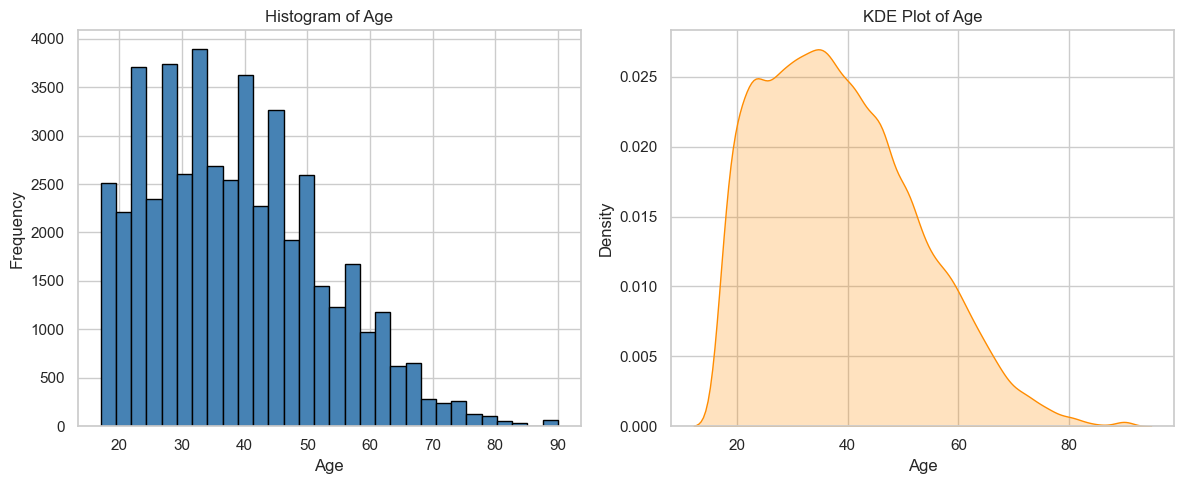

In [1372]:
# Create figure with 2 side-by-side plots
fig, axes = plt.subplots(ncols=2, figsize=(12, 5))

# Plot histogram on the first axis
axes[0].hist(df['age'], bins=30, color='steelblue', edgecolor='black')
axes[0].set_title('Histogram of Age', fontsize=12)
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

# Plot KDE on the second axis
sns.kdeplot(data=df, x='age', fill=True, color='darkorange', ax=axes[1])
axes[1].set_title('KDE Plot of Age', fontsize=12)
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()

### Interpretation :-

---> So with the **Histogram and KDE Plot** side by side i have got **Good Insights in relation to Data Distribution for the column age** :-

- By looking at the **Histogram** i get to know that as the Age is Increasing the frequency is decreasing and that is very logical also. I see majority of the people fall in a age of range from 18 till 50.

- The **KDE Plot** tells me that for the column age i have **Slightly Positively Skewed Data** there are few people with high age and majority of the people have a less age and they are concentrated in a age range from 18 to 50.

I am sure that when i will remove the age which is less than 18 and greater than 60 my Data Distribution will become more compact or i can say more less skewed resulting into "Nearly Normal Distribution".

### Removing the Unnecessary Age from the Column :-

In [1373]:
df.shape  # So before removal i have 48,842 Rows.

(48842, 15)

In [1374]:
# Filtering out unrealistic ages: keeping only those between 18 and 60
df = df[(df['age'] >= 18) & (df['age'] <= 60)]

In [1375]:
df.shape  # After removal i have 44,641 Rows.

(44641, 15)

In [1376]:
48842 - 44641  # Doing some calculation.

4201

In [1377]:
( 4201 / 48842 ) * 100  # Meaning 8% of the data was removed.

8.601203881904917

---> **8% of the age data was unnecessary so it was removed.**

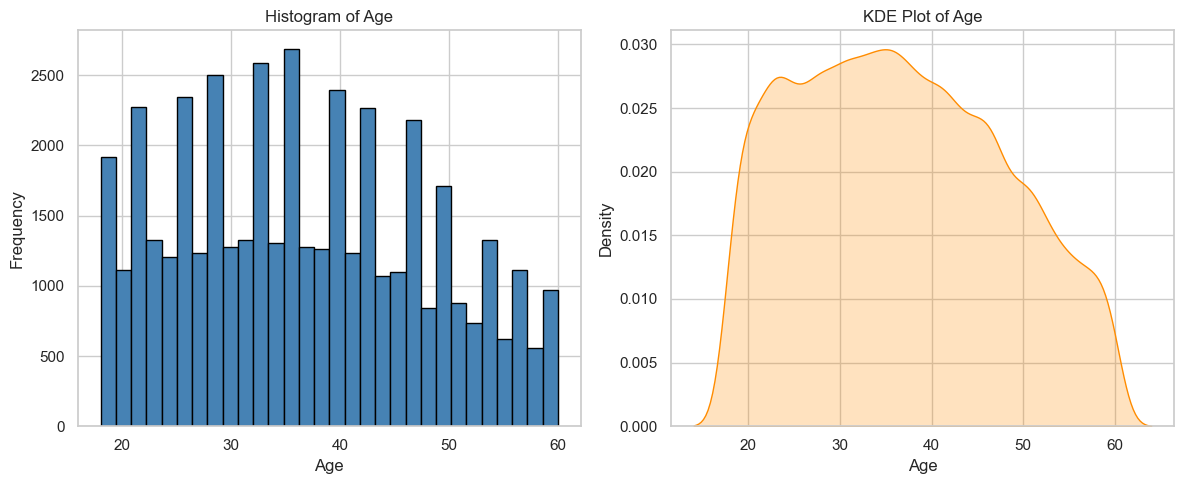

In [1378]:
# Create figure with 2 side-by-side plots
fig, axes = plt.subplots(ncols=2, figsize=(12, 5))

# Plot histogram on the first axis
axes[0].hist(df['age'], bins=30, color='steelblue', edgecolor='black')
axes[0].set_title('Histogram of Age', fontsize=12)
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

# Plot KDE on the second axis
sns.kdeplot(data=df, x='age', fill= True, color='darkorange', ax=axes[1])
axes[1].set_title('KDE Plot of Age', fontsize=12)
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()

In [1379]:
df['age'].skew()  # This will showcase me the skewness value.

0.21274011878284105

### Interpretation :-

---> As Expected now the column age has now turned into a **Normal Distribution** after i removed unnecessary age which were less than 17 and greater than 60. The skewness value is 0.21 telling me that the data is very slightly positively skewed or i can also say that the data is nearly almost "Normally Distributed".

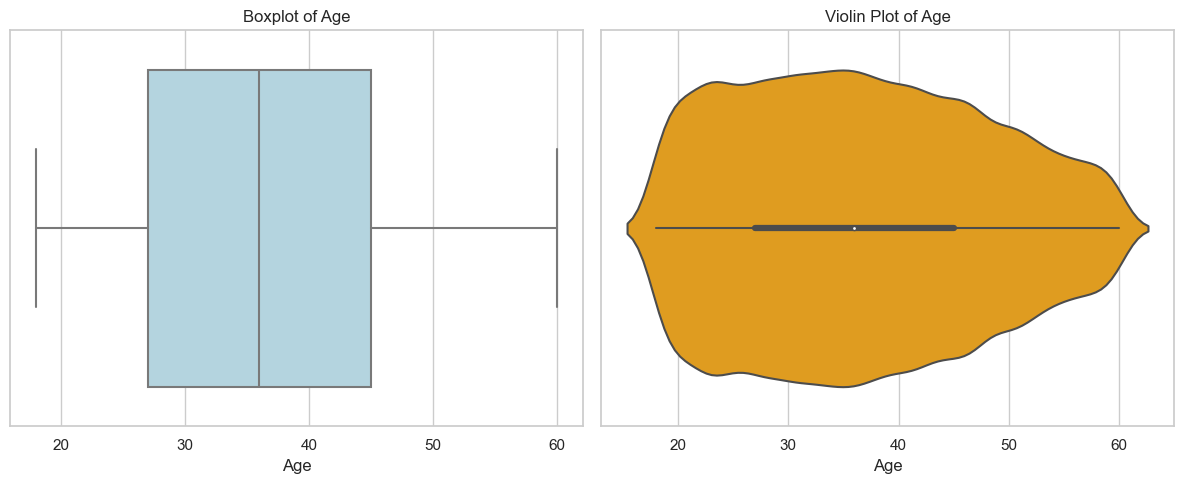

In [1380]:
# Create a figure with 2 subplots side by side
fig, axes = plt.subplots(ncols=2, figsize=(12, 5))

# Boxplot
sns.boxplot(x=df['age'], ax=axes[0], color='lightblue')
axes[0].set_title('Boxplot of Age', fontsize=12)
axes[0].set_xlabel('Age')

# Violin Plot
sns.violinplot(x=df['age'], ax=axes[1], inner='box', color='orange')
axes[1].set_title('Violin Plot of Age', fontsize=12)
axes[1].set_xlabel('Age')

# Tight layout for clean spacing
plt.tight_layout()
plt.show()

### Interpretation :-

- In the **Boxplot** also it is clearly depicted that the column "age" has **No Outliers**.

- In the **Violin Plot** i can clearly see that the data is **Almost Normally Distributed** or i can say it is "very slightly positively skewed".

### Conclusion for Data Preprocessing of column "age" :-

With this i have preprocessed the data for the column "age" went through all the essential things like missing data , outliers , data distribution etc.. also through different visualizations i observed the datas characteristics and patterns.

Most Importantly this column had some age which were unnecessary for our given project so i **cleaned the data by filtering out the unnecessary age which were less than 18 and greater than 60**. With this the column "age" is fully preprocessed and can be used for further processes.

## 4.2 Data Preprocessing for column "workclass" :-

In [1381]:
df.columns  # This will display all the column names present in the dataframe of "df".

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [1382]:
df['workclass']  # This is the column which now i will be preprocessing.

0             Private
1             Private
2           Local-gov
3             Private
4                   ?
             ...     
48837         Private
48838         Private
48839         Private
48840         Private
48841    Self-emp-inc
Name: workclass, Length: 44641, dtype: object

---> Just by looking at the above results i have **Noticed an inconsistency which is Question Mark Data ( ? )** i will have to dive deeper into this and treat it correctly.

In [1383]:
df['workclass'].nunique()  # There are 9 unique data meaning the "Cardinality is Low" which states me that this is a "Categorical Column".

9

In [1384]:
df['workclass'].dtype  # The data type of this column is "object" which is invalid as it should be "category" so i will correct this.

dtype('O')

In [1385]:
df['workclass'] = df['workclass'].astype('category')  # Converting the column to correct data type which is "categroy".

In [1386]:
df['workclass'].dtype  # Now the columns data type is correct which is "Categorical".

CategoricalDtype(categories=['?', 'Federal-gov', 'Local-gov', 'Never-worked', 'Private',
                  'Self-emp-inc', 'Self-emp-not-inc', 'State-gov',
                  'Without-pay'],
, ordered=False, categories_dtype=object)

In [1387]:
df['workclass'].value_counts()  # Seeing the frequency of unique data present in this column.

workclass
Private             31765
Self-emp-not-inc     3290
Local-gov            2882
?                    1997
State-gov            1868
Self-emp-inc         1473
Federal-gov          1346
Without-pay            12
Never-worked            8
Name: count, dtype: int64

---> **The Question Mark Category ( ? ) is very high in number** meaning i cannot simply drop it so i have decide to **Replace it with a category named as `Other`** this is the most appropriate way to handle this as i am not deleting the data nor adding a specific info so by going with this approach i do not create any biased data.

Also next i notice **Two More Inconsistencies which are Two Categories namely "Without-pay" and "Never-worked"** as these individuals are not earning so i will have to remove them.

So i will now deal with these two inconsistencies and correct it.

### Removing The Inconsistencies from the column of "age" :-

In [1388]:
df['workclass'].shape  # Before Removal the number of rows are 44,641.

(44641,)

In [1389]:
df['workclass'].value_counts()  # Before removal i have these two unwanted categories "Without-pay" and "Never-worked"

workclass
Private             31765
Self-emp-not-inc     3290
Local-gov            2882
?                    1997
State-gov            1868
Self-emp-inc         1473
Federal-gov          1346
Without-pay            12
Never-worked            8
Name: count, dtype: int64

In [1390]:
# Filtering (Removing) out the two inconsistent categories
df = df [(df['workclass'] != 'Without-pay') & (df['workclass'] != 'Never-worked')]

# Drop unused category labels to keep it clean
df['workclass'] = df['workclass'].cat.remove_unused_categories()

In [1391]:
df['workclass'].shape  # After Removal the number of rows are 44,621.

(44621,)

In [1392]:
df['workclass'].value_counts()  # After removal the two unwanted categories "Without-pay" and "Never-worked" have been removed successfully.

workclass
Private             31765
Self-emp-not-inc     3290
Local-gov            2882
?                    1997
State-gov            1868
Self-emp-inc         1473
Federal-gov          1346
Name: count, dtype: int64

In [1393]:
df['workclass'] = df['workclass'].replace ( "?" , "Others" )  # Replacing the question mark (?) category with a logical name which is "Others". 

In [1394]:
df['workclass'].value_counts()  # The question mark (?) category has been replaced correctly now with the name of "Other".

workclass
Private             31765
Self-emp-not-inc     3290
Local-gov            2882
Others               1997
State-gov            1868
Self-emp-inc         1473
Federal-gov          1346
Name: count, dtype: int64

---> **So i have Corrected Two Important Inconsistencies which could Negatively Impact The Machine Learning Model.**

In [1395]:
df['workclass'].isna().sum()  # There are no missing data in this column.

0

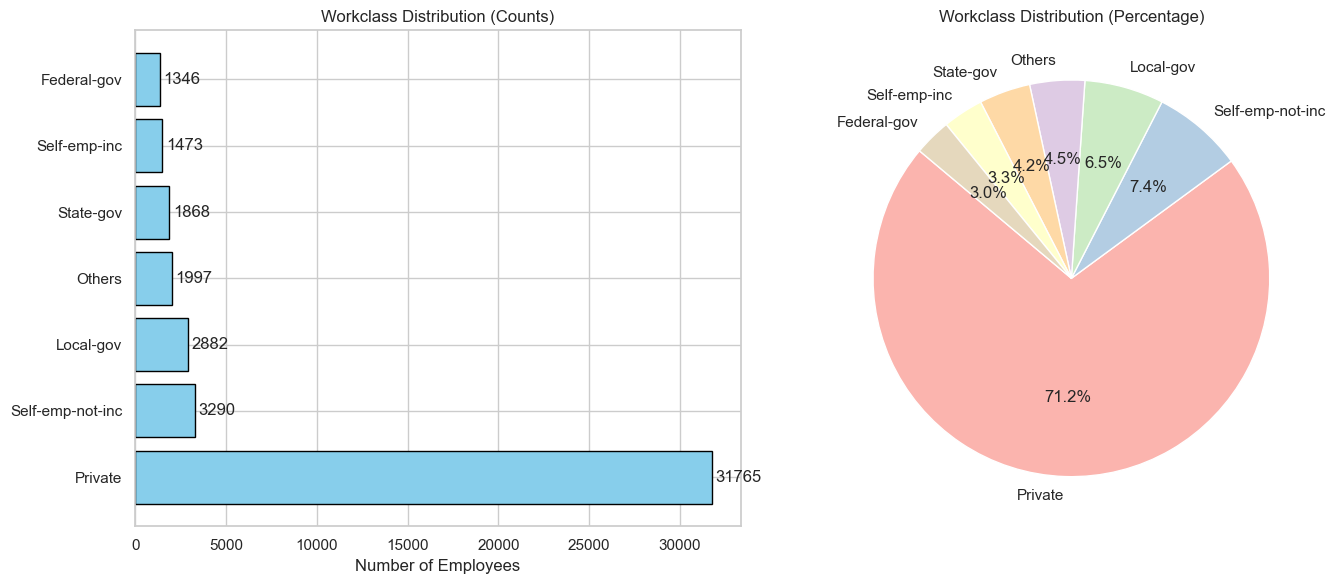

In [1396]:
# Count values
workclass_counts = df['workclass'].value_counts()
workclass_percent = workclass_counts / len(df) * 100

# Set up subplots
fig, axes = plt.subplots(ncols=2, figsize=(14, 6))

# --- Left: Bar Chart with Counts ---
axes[0].barh(workclass_counts.index, workclass_counts.values, color='skyblue', edgecolor='black')
axes[0].set_title('Workclass Distribution (Counts)', fontsize=12)
axes[0].set_xlabel('Number of Employees')

# Add labels on bars
for i, v in enumerate(workclass_counts.values):
    axes[0].text(v + 200, i, str(v), va='center')

# --- Right: Pie Chart with Percentages ---
axes[1].pie(workclass_percent.values,
            labels=workclass_percent.index,
            autopct='%1.1f%%',
            startangle=140,
            colors=plt.cm.Pastel1.colors)
axes[1].set_title('Workclass Distribution (Percentage)', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()

### Interpretation :-

So with the above visualization i get to know that how is the Distribution among the categories in this column and by looking it i get to know that i have **Imbalance Data** but i feel this is a type of imbalance which is logical as majority of the individuals in a country are working for Private only then self employ then local gov so **i feel this Imbalance Nature of data is not a problem rather it is totally valid and resonaste with the Real World**.

### Conclusion for Data Preprocessing of column "workclass" :-

With this i have preprocessed the data for the column "workclass" went through all the essential things like missing data , outliers , data distribution etc.. also through different visualizations i observed the datas characteristics and patterns.

Most Importantly this column had some inconsistencies which were unnecessary for our given project so i **cleaned the data by filtering out the unnecessary categories and also replaced a illogical data**. With this the column "workclass" is fully preprocessed and can be used for further processes.

## 4.3 Data Preprocessing for column "fnlwgt" :-

In [1397]:
df.columns  # This will display all the column names present in the dataframe of "df".

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

### Dropping the `fnlwgt` Column: My Thought Process and Final Decision :-

I was not initially clear about what the column `fnlwgt` actually represented, so I decided to pause and dig deeper before making any decision regarding whether to keep or drop it. I started researching its purpose and usage thoroughly.

What I found is that `fnlwgt` stands for **final weight**. This column is used by the U.S. Census Bureau and represents the number of people in the overall U.S. population that the given record (individual) represents. For instance, if one individual's `fnlwgt` is 10,000, it means that person represents 10,000 people with similar characteristics (like age, occupation, education, etc.) in the U.S. population. It’s essentially a **weighting factor** used for demographic and population-level analysis to ensure statistical representativeness.

After understanding this, I started questioning whether this column would be useful for the predictive model I am building. Since my objective is to build a **binary classification model that predicts whether an individual earns more than \$50K or not**, the inclusion of `fnlwgt` began to seem a bit suspicious and unnecessary.

To be sure, I went for **deeper research**. I consulted multiple sources including Google searches, discussions on forums like Stack Overflow and Kaggle, and also looked into some academic resources and machine learning blogs. Almost everywhere, the conclusion was the same: **the `fnlwgt` column is generally not useful in predictive modeling tasks focused on individual-level prediction**, like mine.

Why? Because `fnlwgt` doesn’t describe the individual , it describes how many people they are similar to in the broader population. In simpler terms, it does not help the model in learning meaningful patterns about **whether *this* individual earns more than \$50K**. Instead, it can actually add noise or unnecessary complexity. Since I’m focusing on **individual predictions and not population-level estimates**, this column is irrelevant for my task.

So, after this thorough exploration and critical thinking, I’ve decided to **drop the `fnlwgt` column** from my dataset. This decision is based on a clear understanding of its meaning and **backed by research and cross-verification**.

This was an important exercise and part of my feature evaluation process. I will now proceed to implement this in my code.

In [1398]:
df['fnlwgt']  # This is the column which i have decided to remove as this will inturn confuse our ML Model.

0        226802
1         89814
2        336951
3        160323
4        103497
          ...  
48837    257302
48838    154374
48839    151910
48840    201490
48841    287927
Name: fnlwgt, Length: 44621, dtype: int64

In [1399]:
df.columns  # So before removal i have the column "fnlwgt".

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [1400]:
df.drop('fnlwgt', axis = 1, inplace = True)  # I am dropping / removing the column "fnlwgt" from the dataframe.

In [1401]:
df.columns  # So after removal the column "fnlwgt" is no more it has been dropped successfully.

Index(['age', 'workclass', 'education', 'educational-num', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')

### Conclusion for Data Preprocessing of column "fnlwgt" :-

With this i have preprocessed the data for the column "fnlwgt" where i **Removed this column from the dataframe as this decision was made after deep research and valiadtion.**

## 4.4 Data Preprocessing for column "education" and "educational-num" :-

In [1402]:
df.columns  # This will display all the column names present in the dataframe of "df".

Index(['age', 'workclass', 'education', 'educational-num', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')

In [1403]:
df[['education', 'educational-num']]  # Both these columns are similar only.

,education,educational-num
0,11th,7
1,HS-grad,9
2,Assoc-acdm,12
3,Some-college,10
4,Some-college,10
...,...,...
48837,Assoc-acdm,12
48838,HS-grad,9
48839,HS-grad,9
48840,HS-grad,9


---> I can already see that the **Two Different Columns "education" and "educational-num" represent the same data only just that column "educational-num" represents it in the form of "Numerical Data" this is infact Encoded Data so i have decided that i will Drop the column "educational-num" and go with using "educational" just before i do this i will validate that do they both have similar data or they differ if everything is same i will implement by dropping one column and keeping other tackling the problem of "Data Redundancy".**

In [1404]:
df['education'].nunique()  # So number of unique data in the column "education" is 16.

16

In [1405]:
df['educational-num'].nunique()  # So number of unique data in the column "education" is also 16.

16

#### ---> Both the Different Data Columns have Same Number Of Unique Data.

In [1406]:
df['education'].value_counts()  # Seeing the unique data and its frequency for the column "education".

education
HS-grad         14540
Some-college    10313
Bachelors        7566
Masters          2456
Assoc-voc        1958
Assoc-acdm       1538
11th             1430
10th             1032
Prof-school       731
7th-8th           676
9th               623
12th              552
Doctorate         508
5th-6th           430
1st-4th           197
Preschool          71
Name: count, dtype: int64

In [1407]:
df['educational-num'].value_counts()  # Seeing the unique data and its frequency for the column "educational-num".

educational-num
9     14540
10    10313
13     7566
14     2456
11     1958
12     1538
7      1430
6      1032
15      731
4       676
5       623
8       552
16      508
3       430
2       197
1        71
Name: count, dtype: int64

#### ---> Both the Different Data Columns have Same Data Distribution for Unique Data.

In [1408]:
df['education'].isna().sum()  # The column "education" has no missing data.

0

In [1409]:
df['educational-num'].isna().sum()  # The column "education" also has no missing data.

0

#### ---> Both the Different Data Columns have No Missing Data.

**With this i have validated that i have Redundant Data present in this Dataframe where two different columns which are "education" and "educational-num" represent the same data so i have decided that i will "Drop / Remove" the column "educational-num" and will keep "education" because i need to right now preprocess the data and if i will go with using the numerical data of "educational-num" i will not be able to understand what number means what education so it will cause lot of erros and hence i have decided to take this approach and when all of this will be done at last all of the columns in my dataframe i will convert them to numerical data through encoding and hence that is not at all the concern.**

In [1410]:
df.columns  # Before dropping i have the column "educational-num" in my dataframe.

Index(['age', 'workclass', 'education', 'educational-num', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')

In [1411]:
df.drop('educational-num', axis=1, inplace=True )  # Dropping the column "educational-num" from the dataframe as it causes "Redundancy".

In [1412]:
df.columns  # After dropping i do not have the column "educational-num" in my dataframe meaning it has been dropped successfully.

Index(['age', 'workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country', 'income'],
      dtype='object')

#### So now i will be peforming EDA & Data Preprocessing on the column "education" :-

In [1413]:
df['education'].isna().sum()  # There are no missing data in this column as well which is good for us.

0

In [1414]:
df['education'].nunique()  # There are 16 unique data in this column meaning the "Cardinality is Low" which is perfrect for a categorical column.

16

In [1415]:
df['education'].value_counts()  # Seeing what all unique categories i have in this column and their respective frequencies.

education
HS-grad         14540
Some-college    10313
Bachelors        7566
Masters          2456
Assoc-voc        1958
Assoc-acdm       1538
11th             1430
10th             1032
Prof-school       731
7th-8th           676
9th               623
12th              552
Doctorate         508
5th-6th           430
1st-4th           197
Preschool          71
Name: count, dtype: int64

### Inconsistencies Found :-

Now i have already seen some Catgeories in this Column which i will have to remove which are "1oth" , "11th" , "5th-6th" etc...

In [1416]:
df[df['education']=="10th"]  # Filtering the data according to wherever the column "education" is 10th.

,age,workclass,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
5,34,Private,10th,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
97,49,Private,10th,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,United-States,<=50K
105,36,Private,10th,Separated,Machine-op-inspct,Not-in-family,White,Female,0,0,40,United-States,<=50K
139,23,Private,10th,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,United-States,<=50K
267,29,Private,10th,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,25,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48634,36,Private,10th,Divorced,Transport-moving,Unmarried,White,Male,0,0,48,United-States,<=50K
48786,33,Private,10th,Never-married,Adm-clerical,Not-in-family,Black,Male,0,0,40,United-States,<=50K
48789,45,Private,10th,Divorced,Other-service,Not-in-family,Black,Female,0,0,38,Dominican-Republic,<=50K
48807,32,Private,10th,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K


In [1417]:
df[df['education']=="12th"]  # Filtering the data according to wherever the column "education" is 12th.

,age,workclass,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
230,18,Private,12th,Never-married,Priv-house-serv,Own-child,White,Male,0,0,40,United-States,<=50K
617,52,Private,12th,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,1628,40,United-States,<=50K
681,33,Self-emp-not-inc,12th,Never-married,Transport-moving,Not-in-family,White,Male,0,0,40,United-States,<=50K
713,44,Private,12th,Divorced,Other-service,Not-in-family,White,Male,0,0,40,United-States,<=50K
893,27,Local-gov,12th,Never-married,Other-service,Own-child,Black,Female,0,0,44,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48626,18,Private,12th,Never-married,Other-service,Own-child,White,Male,0,0,12,United-States,<=50K
48673,18,Private,12th,Never-married,Adm-clerical,Own-child,White,Male,0,0,35,United-States,<=50K
48757,35,Private,12th,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,84,United-States,<=50K
48758,49,Others,12th,Divorced,?,Other-relative,Black,Male,0,0,40,United-States,<=50K


In [1418]:
df[df['education']=="Preschool"]  # Filtering the data according to wherever the column "education" is Preschool.

,age,workclass,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
818,21,Private,Preschool,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,25,Mexico,<=50K
1029,57,Others,Preschool,Separated,?,Not-in-family,White,Male,0,0,40,United-States,<=50K
1059,31,Private,Preschool,Never-married,Handlers-cleaners,Not-in-family,Amer-Indian-Eskimo,Male,0,0,25,United-States,<=50K
1489,19,Private,Preschool,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,36,Mexico,<=50K
1498,37,Self-emp-not-inc,Preschool,Married-civ-spouse,Sales,Husband,White,Male,0,0,30,Mexico,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48079,31,State-gov,Preschool,Never-married,Other-service,Not-in-family,White,Male,0,0,24,United-States,<=50K
48316,40,Private,Preschool,Married-civ-spouse,Other-service,Husband,White,Male,0,1672,40,Mexico,<=50K
48505,40,Private,Preschool,Never-married,Other-service,Not-in-family,White,Female,0,0,20,United-States,<=50K
48640,46,Private,Preschool,Married-civ-spouse,Machine-op-inspct,Other-relative,Black,Male,0,0,75,Dominican-Republic,<=50K


### 🧠 Reflecting on the `education` Column: My Learning Process

Initially, when I was exploring the `education` column, I noticed entries like **'Preschool'**, **'10th'**, and **'12th'**. My first assumption was that these entries represented **school-going children**, and since this project is focused on adult data, I believed these categories might be irrelevant or misleading. Based on that assumption, I thought about **removing** these categories entirely from the dataset.

However, before making any changes, I decided to **validate my assumption**. So I filtered the dataset for these specific education levels (`'Preschool'`, `'10th'`, `'12th'`) and checked the corresponding records.

To my surprise, I found that **individuals with these education levels were indeed adults** and had valid entries for age, workclass, occupation, etc. This made it clear that **these categories are not about children**, but rather about adults whose highest level of education is school-level.

This was an **important realization**. It highlighted that I should **not rely purely on intuition or assumptions** when dealing with categorical data. Instead, I should always **verify with actual data** before taking any action like dropping or transforming categories.

Because i had already **filtered / removed children data previously** only when i was dealing with the column of "age" where i had removed the data where the age was less than 18 so obviously now i will not have anyone which is not earning.

Eventually, I decided to **keep these categories** and these are not at all invalid catgeories infact they are totally valid and very important. For now, the key takeaway for me is: **never make assumptions blindly — let the data speak first.**

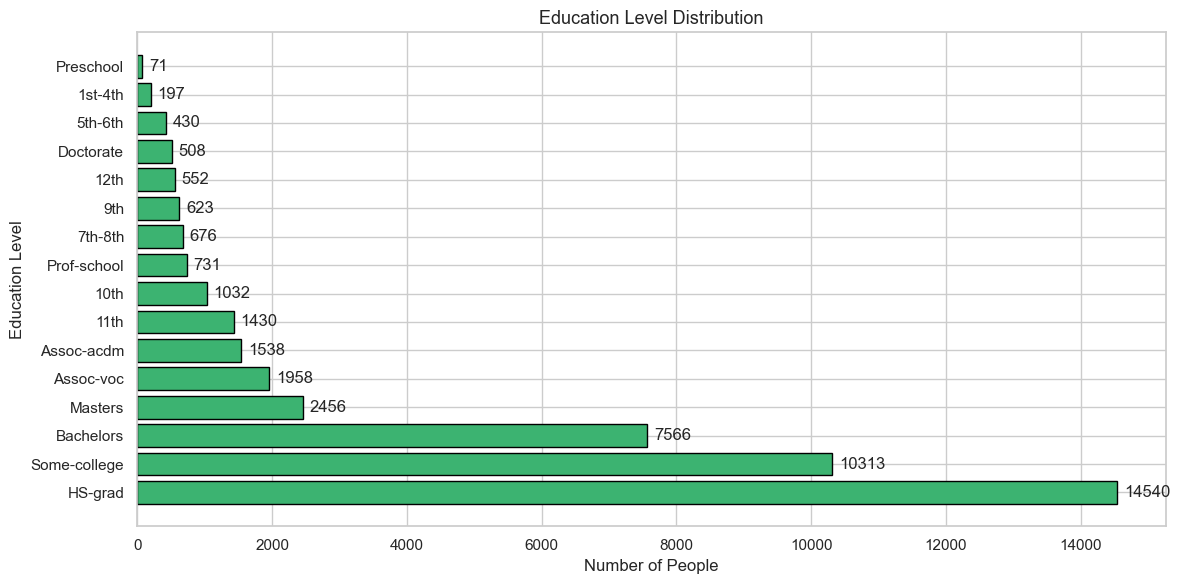

In [1419]:
# Get value counts for education
edu_counts = df['education'].value_counts()

# Plotting
plt.figure(figsize=(12, 6))
bars = plt.barh(edu_counts.index, edu_counts.values, color='mediumseagreen', edgecolor='black')

# Add value labels on bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 100, bar.get_y() + bar.get_height() / 2, str(width), va='center')

plt.title('Education Level Distribution', fontsize=13)
plt.xlabel('Number of People')
plt.ylabel('Education Level')
plt.tight_layout()
plt.show()

### Interpretation :-

- So currently the data in the column "education" is totally **"Imbalanced Data"** i see some education categories have very high frequency ( example :- HS-grad , Some-college etc.. ) whereas some have very less frequency ( example :- Preschool , 1st-4th etc.. ).

- Also the **"Cardinality"** is also a little high as there are a good amount of different categories in this column.

### Binning the `education` Column

While exploring the `education` column, I observed that it has **high cardinality** – meaning it contains a large number of unique categories. Many of these categories, when examined closely, **are closely related or represent levels of education that can logically be grouped together**. For example:

- `'Preschool'`, `'1st-4th'`, `'5th-6th'`, and `'7th-8th'` — all belong to basic **elementary schooling**.

- `'9th'`, `'10th'`, `'11th'`, and `'12th'` — are typical grades associated with **high school** level education.

- `'HS-grad'` and `'Some-college'` — both indicate that a person has **graduated from high school** and may have some exposure to college but no formal degree.

- `'Assoc-voc'` and `'Assoc-acdm'` — are two types of **associate degrees**.

- `'Bachelors'`, `'Masters'`, `'Doctorate'`, and `'Prof-school'` — are higher education levels, but each of them is **kept separate** to retain granularity.

So, I considered **binning** as a way to simplify this column by combining only some of the similar education levels. The benefits of binning here are:

- **Reduces complexity** by decreasing the number of unique categories without removing valuable details.

- **Improves interpretability** by grouping similar low-level education categories.

- Helps in **avoiding the curse of dimensionality** when converting categorical data into numerical form (e.g., one-hot encoding later on).

- **Makes visualizations and statistical summaries more readable.**

I decided to **only bin the lower and intermediate education levels**, while keeping the **higher education levels separate** because:

- The difference between, say, a Master's and a Doctorate, can have a significant effect on salary, job role, or career trajectory.

- Combining them might lead to **loss of meaningful insights** in downstream analysis.

#### Final Binning Strategy

| Original Education Levels                          | New Binned Category |
|----------------------------------------------------|---------------------|
| 'Preschool', '1st-4th', '5th-6th', '7th-8th'       | Elementary          |
| '9th', '10th', '11th', '12th'                      | HighSchool          |
| 'HS-grad', 'Some-college'                          | Graduate            |
| 'Assoc-voc', 'Assoc-acdm'                          | Associate           |
| 'Bachelors'                                        | Bachelors           |
| 'Masters'                                          | Masters             |
| 'Doctorate'                                        | Doctorate           |
| 'Prof-school'                                      | Prof-school         |

This way, I retain the **core information** while improving the dataset structure, especially for downstream machine learning models and analysis. **Initially ( originally ) i had 16 distinct categories now after my Binning Approach i Reduce the Cardinality to just 8 Distinct Catgeories**.

In [1420]:
df['education'].nunique()  # Originally i have 16 unique categories.

16

In [1421]:
df['education'].value_counts()  # These are the original categories before binning.

education
HS-grad         14540
Some-college    10313
Bachelors        7566
Masters          2456
Assoc-voc        1958
Assoc-acdm       1538
11th             1430
10th             1032
Prof-school       731
7th-8th           676
9th               623
12th              552
Doctorate         508
5th-6th           430
1st-4th           197
Preschool          71
Name: count, dtype: int64

In [1422]:
# Defining binning map for education levels
education_map = {
    'Preschool': 'Elementary',
    '1st-4th': 'Elementary',
    '5th-6th': 'Elementary',
    '7th-8th': 'Elementary',
    
    '9th': 'HighSchool',
    '10th': 'HighSchool',
    '11th': 'HighSchool',
    '12th': 'HighSchool',
    
    'HS-grad': 'Graduate',                    # This will do the "Binnning".
    'Some-college': 'Graduate',
    
    'Assoc-voc': 'Associate',
    'Assoc-acdm': 'Associate',
    
    'Bachelors': 'Bachelors',
    'Masters': 'Masters',
    'Doctorate': 'Doctorate',
    'Prof-school': 'Prof-school'
}

# Applying the mapping to create a new binned column
df['education'] = df['education'].replace(education_map)

In [1423]:
df['education'].nunique()  # Now after "Binnning" i have 8 unique categories where previosuly i had 16 i reduced it by half 50%.

8

In [1424]:
df['education'].value_counts()  # These are the new categories after binning.

education
Graduate       24853
Bachelors       7566
HighSchool      3637
Associate       3496
Masters         2456
Elementary      1374
Prof-school      731
Doctorate        508
Name: count, dtype: int64

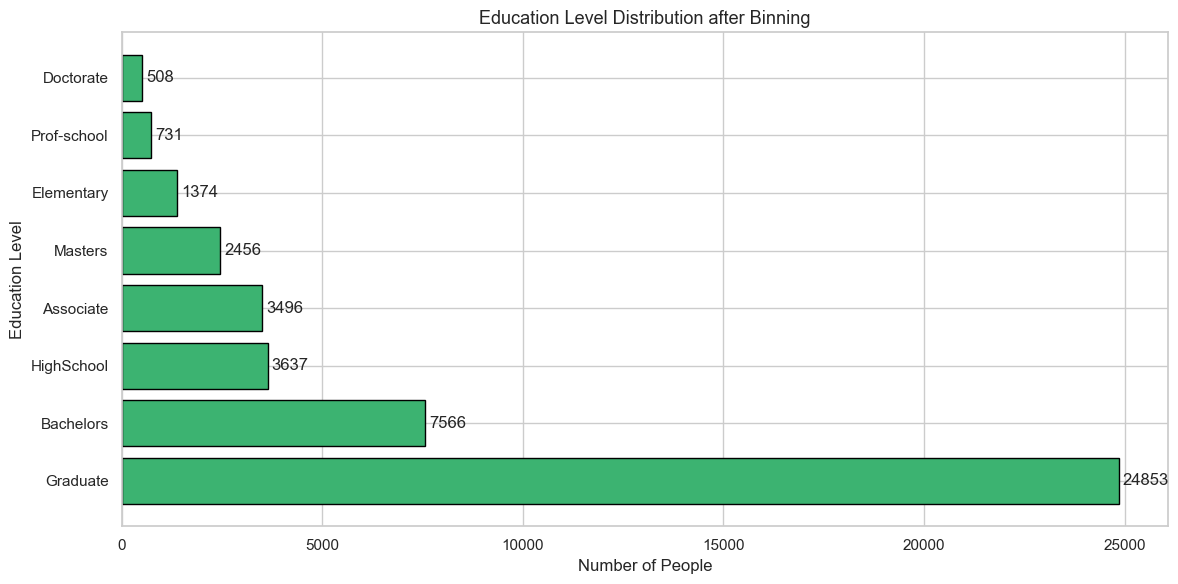

In [1425]:
# Get value counts for education
edu_counts = df['education'].value_counts()

# Plotting
plt.figure(figsize=(12, 6))
bars = plt.barh(edu_counts.index, edu_counts.values, color='mediumseagreen', edgecolor='black')

# Add value labels on bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 100, bar.get_y() + bar.get_height() / 2, str(width), va='center')

plt.title('Education Level Distribution after Binning', fontsize=13)
plt.xlabel('Number of People')
plt.ylabel('Education Level')
plt.tight_layout()
plt.show()

In [1426]:
df['education'].dtype  # The data type of this column is "object" which now i will convert to "category".

dtype('O')

In [1427]:
df['education'] = df['education'].astype('category')  # Converting the columns data type to "category".

In [1428]:
df['education'].dtype  # The data type of this column "education" is now correct which is "category".

CategoricalDtype(categories=['Associate', 'Bachelors', 'Doctorate', 'Elementary',
                  'Graduate', 'HighSchool', 'Masters', 'Prof-school'],
, ordered=False, categories_dtype=object)

### Conclusion for Data Preprocessing of column "educational-num" and "education" :-

With this i have **preprocessed the data for the column "educational-num" and "education"** went through all the essential things like missing data , outliers , data distribution etc.. also through different visualizations i observed the datas characteristics and patterns.

Most Importantly this column had **"Issue of Data Redundancy"** where i dropped one column which was "educational-num" and continued with the column of "education".

Lastly i also saw that in the column "education" there were **"Issues regarding High Cardinality"** i saw that there were various education catgeories which i could group into one single category through the process of **"Binning"** which would yield various positive results so i did this **"Reducing the Cardinality from 18 Distinct Categories to just 8 Distinct Catgeories for the column education".

With this i have preprocessed the data for the column "education" and now **it can be used for any further processes.**

## 4.5 Data Preprocessing for column "marital-status" :-

In [1429]:
df.columns  # This will display all the column names present in the dataframe of "df".

Index(['age', 'workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country', 'income'],
      dtype='object')

In [1430]:
df['marital-status']  # This is the column now i will be understanding in detail about and also preprocessing it parallelly.

0             Never-married
1        Married-civ-spouse
2        Married-civ-spouse
3        Married-civ-spouse
4             Never-married
                ...        
48837    Married-civ-spouse
48838    Married-civ-spouse
48839               Widowed
48840         Never-married
48841    Married-civ-spouse
Name: marital-status, Length: 44621, dtype: object

In [1431]:
df['marital-status'].isna().sum()  # There are no missing data present in this column also.

0

In [1432]:
df['marital-status'].value_counts()  # Seeing the unique values of the column and their respective frequencies.

marital-status
Married-civ-spouse       20236
Never-married            15304
Divorced                  6228
Separated                 1475
Widowed                    759
Married-spouse-absent      583
Married-AF-spouse           36
Name: count, dtype: int64

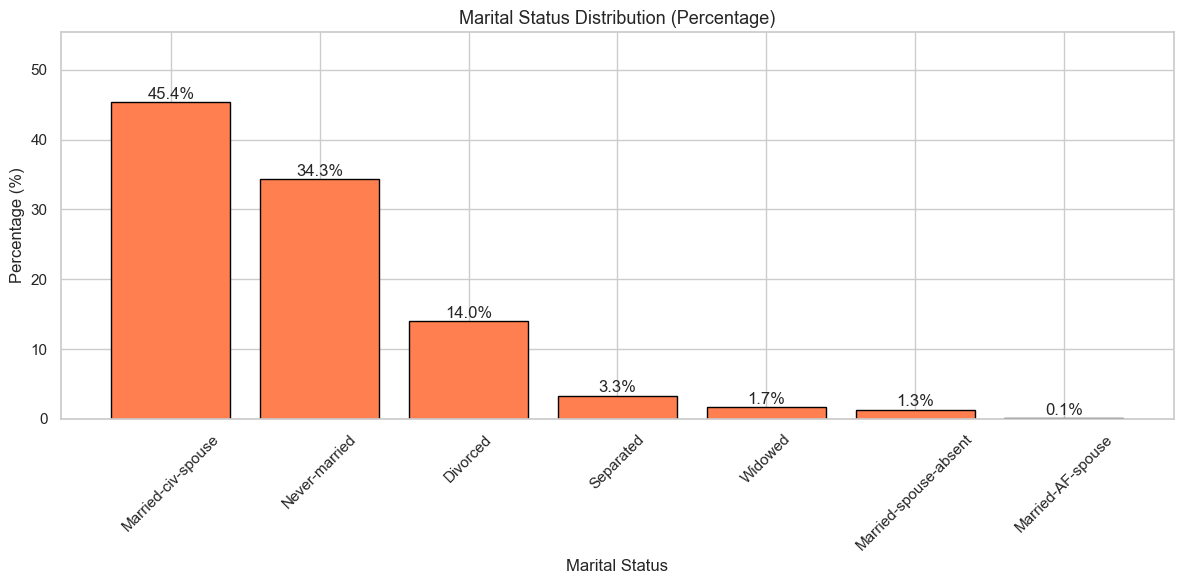

In [1433]:
# Calculate percentage distribution
marital_percent = df['marital-status'].value_counts(normalize=True) * 100

# Plotting
plt.figure(figsize=(12, 6))
bars = plt.bar(marital_percent.index, marital_percent.values, color='coral', edgecolor='black')

# Rotate x-axis labels for better visibility (optional)
plt.xticks(rotation=45)

# Add percentage labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f"{height:.1f}%", ha='center')

plt.title('Marital Status Distribution (Percentage)', fontsize=13)
plt.ylabel('Percentage (%)')
plt.xlabel('Marital Status')
plt.ylim(0, max(marital_percent.values) + 10)  # Buffer for label
plt.tight_layout()
plt.show()

---> I can see that the column "marital-status" has an **"Imbalanced Data"** but i feel doing any changing in this can lead to creation of bias data also binning here would not at all be helpful infact it will bring negative effects because here every unique category is very different than other so keeping them as they are already is the best and optimal choice hence i will do so.

In [1434]:
df['marital-status'].dtype  # The data type of this column is "object" which now i will convert to "category".

dtype('O')

In [1435]:
df['marital-status'] = df['marital-status'].astype('category')  # Converting the columns data type to "category".

In [1436]:
df['marital-status'].dtype  # The data type of this column "marital-status" is now correct which is "category".

CategoricalDtype(categories=['Divorced', 'Married-AF-spouse', 'Married-civ-spouse',
                  'Married-spouse-absent', 'Never-married', 'Separated',
                  'Widowed'],
, ordered=False, categories_dtype=object)

In [1437]:
df['marital-status'].mode()  # So the mode is "Married-civ-spouse".

0    Married-civ-spouse
Name: marital-status, dtype: category
Categories (7, object): ['Divorced', 'Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed']

### Conclusion for Data Preprocessing of column "educational-num" and "education" :-

With this i have **preprocessed the data for the column "marital-status"** went through all the essential things like missing data , outliers , data distribution etc.. there was just one small inconsistency for this column which was wrong data type "object" which i corrected by converting it to appropriate data type which is "category".

With this i have preprocessed the data for the column "marital-status" and now **it can be used for any further processes.**

## 4.6 Data Preprocessing for column "occupation" :-

In [1438]:
df.columns  # This will display all the column names present in the dataframe of "df".

Index(['age', 'workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country', 'income'],
      dtype='object')

In [1439]:
df['occupation']  # This is the column now i will be understanding in detail about and also preprocessing it parallelly.

0        Machine-op-inspct
1          Farming-fishing
2          Protective-serv
3        Machine-op-inspct
4                        ?
               ...        
48837         Tech-support
48838    Machine-op-inspct
48839         Adm-clerical
48840         Adm-clerical
48841      Exec-managerial
Name: occupation, Length: 44621, dtype: object

---> Already once again i have found an **Inconsistency which is Question Mark ( ? )** i will have to correct this.

In [1440]:
df['occupation'].isna().sum()  # This also has no missing data in it.

0

In [1441]:
df['occupation'].value_counts()  # Seeing the unique categories in this column and their respective frequencies.

occupation
Craft-repair         5845
Prof-specialty       5758
Exec-managerial      5638
Adm-clerical         5234
Sales                4974
Other-service        4408
Machine-op-inspct    2885
Transport-moving     2187
?                    1997
Handlers-cleaners    1934
Tech-support         1396
Farming-fishing      1266
Protective-serv       908
Priv-house-serv       176
Armed-Forces           15
Name: count, dtype: int64

### Interpretation :-

After looking at the above results I have got to know that there are **Two Inconsistencies** which I have decided to deal with and correct them :-

- First , I can see that there is a category which has a data in it which is as **Question Mark ( ? )** So I will have to **Replace** this with a category name which is appropriate

- Second , I can see that there is a category named **Armed-Forces** and it has just 15 occurrences so I have decided to **Remove** all the rows where the category is armed forces because there are various reason number one the frequency is a very low so the insights generated from this might not be statistically strong and are machine learning model would not be able to learn much from this because the number of instances are very less secondly I am making an employee salary prediction model where taking armed forces into consideration is not correct as they are not particularly employee but rather government services.

Other than this a **Good Thing** which I noticed for this colum is that the **Data is Almost "Balance" in all the Categories** like it starts from 5845 and i can see that there is not much drop in frequency meaning the differences in the frequency of different categories is not very high which is good which basically tells me that all most every category has substantial amount of data in it and there are not much differences which gets me to the conclusion that the data is not highly imbalance which is good for our "Machine Learning Model" it will be able to learn the patterns in a very good manner without getting "Biased" for any category which has more data.

### Removing The Inconsistencies from the column of "occupation" :-

In [1442]:
df[df['occupation'] == '?']  # Filtering the data according to wherever i have the occupation as "?".

# This is my "First Inconsistency" and now i will correct this , i have an illogical category name which is "Question Mark ( ? )".

,age,workclass,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
4,18,Others,Graduate,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
6,29,Others,Graduate,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
13,58,Others,Graduate,Married-civ-spouse,?,Husband,White,Male,0,0,35,United-States,<=50K
89,41,Others,Masters,Married-civ-spouse,?,Wife,White,Female,7688,0,10,United-States,>50K
100,51,Others,Graduate,Married-civ-spouse,?,Wife,White,Female,0,0,18,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48758,49,Others,HighSchool,Divorced,?,Other-relative,Black,Male,0,0,40,United-States,<=50K
48771,60,Others,HighSchool,Divorced,?,Not-in-family,Black,Male,0,0,35,United-States,<=50K
48811,35,Others,Bachelors,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
48812,30,Others,Bachelors,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K


**---> I could easily delete the rows where i have this "?" Category but i cannot do that as i can see its frequency is 1997 so it is high hence i have decided to replace it with a correct name.**

### Handling Inconsistent Category in Occupation Column

I noticed that the `occupation` column contains a `'?'` which indicates missing or unknown data for ~1,997 rows.

Since this is a significant portion of the dataset, dropping it isn't ideal. However, replacing it with something generic like `'Others'` may conflict with the existing `'Other-service'` category.

Therefore, I've created a new label `'Unknown'` to represent this clearly and avoid ambiguity. This ensures that:
- Data is retained
- The model treats this as a distinct category
- Interpretation later remains clean and meaningful

So i will **Replace** this category "?" with "Unknown".

In [1443]:
df['occupation'] = df['occupation'].replace('?', 'Unknown')  # Replacing the category "?" with "Unknown".

In [1444]:
df['occupation'].value_counts()  # The category "?" is successfully Replaced with "Unknown".

occupation
Craft-repair         5845
Prof-specialty       5758
Exec-managerial      5638
Adm-clerical         5234
Sales                4974
Other-service        4408
Machine-op-inspct    2885
Transport-moving     2187
Unknown              1997
Handlers-cleaners    1934
Tech-support         1396
Farming-fishing      1266
Protective-serv       908
Priv-house-serv       176
Armed-Forces           15
Name: count, dtype: int64

In [1445]:
df[df['occupation'] == '?']  # There no more exists a category name with Question Mark "?".

,age,workclass,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income


In [1446]:
df[df['occupation'] == 'Unknown']  # Instead i now have a category name with "Unknown" which was previously "?".

,age,workclass,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
4,18,Others,Graduate,Never-married,Unknown,Own-child,White,Female,0,0,30,United-States,<=50K
6,29,Others,Graduate,Never-married,Unknown,Unmarried,Black,Male,0,0,40,United-States,<=50K
13,58,Others,Graduate,Married-civ-spouse,Unknown,Husband,White,Male,0,0,35,United-States,<=50K
89,41,Others,Masters,Married-civ-spouse,Unknown,Wife,White,Female,7688,0,10,United-States,>50K
100,51,Others,Graduate,Married-civ-spouse,Unknown,Wife,White,Female,0,0,18,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48758,49,Others,HighSchool,Divorced,Unknown,Other-relative,Black,Male,0,0,40,United-States,<=50K
48771,60,Others,HighSchool,Divorced,Unknown,Not-in-family,Black,Male,0,0,35,United-States,<=50K
48811,35,Others,Bachelors,Married-civ-spouse,Unknown,Wife,White,Female,0,0,55,United-States,>50K
48812,30,Others,Bachelors,Never-married,Unknown,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K


In [1447]:
df[df['occupation'] == 'Armed-Forces']  # Filtering the data according to wherever i have the occupation as "Armed-Forces".

# This is my "Second Inconsistency" and now i will correct this by removing all the rows which have occupation as "Armed-Forces".

,age,workclass,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
88,24,Federal-gov,Graduate,Never-married,Armed-Forces,Not-in-family,White,Male,0,0,40,United-States,<=50K
5258,30,Federal-gov,Graduate,Married-civ-spouse,Armed-Forces,Husband,White,Male,0,0,48,United-States,>50K
7991,52,Federal-gov,Prof-school,Married-civ-spouse,Armed-Forces,Husband,White,Male,7298,0,50,United-States,>50K
10047,27,Federal-gov,Associate,Married-civ-spouse,Armed-Forces,Husband,White,Male,0,0,40,?,>50K
10947,44,Federal-gov,Masters,Married-civ-spouse,Armed-Forces,Husband,White,Male,0,0,40,United-States,>50K
13453,23,Federal-gov,Graduate,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,<=50K
16723,24,Federal-gov,Graduate,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,<=50K
17581,29,Federal-gov,Graduate,Never-married,Armed-Forces,Not-in-family,Black,Male,0,0,60,United-States,<=50K
30894,39,Federal-gov,Graduate,Never-married,Armed-Forces,Not-in-family,White,Male,0,0,50,United-States,<=50K
32392,24,Federal-gov,Bachelors,Never-married,Armed-Forces,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [1448]:
len (df[df['occupation'] == 'Armed-Forces'])  # There are just 15 records so there would be a very minimal data loss so no worries.

15

In [1449]:
df = df[df['occupation'] != 'Armed-Forces']  # This will remove the occupation "Armed-Forces".

In [1450]:
df['occupation'].value_counts()  # The occupation "Armed-Forces" has been successfully Removed.

occupation
Craft-repair         5845
Prof-specialty       5758
Exec-managerial      5638
Adm-clerical         5234
Sales                4974
Other-service        4408
Machine-op-inspct    2885
Transport-moving     2187
Unknown              1997
Handlers-cleaners    1934
Tech-support         1396
Farming-fishing      1266
Protective-serv       908
Priv-house-serv       176
Name: count, dtype: int64

In [1451]:
df[df['occupation'] == 'Armed-Forces']  # There no more exists an occupation name with Question Mark "Armed-Forces".

,age,workclass,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income


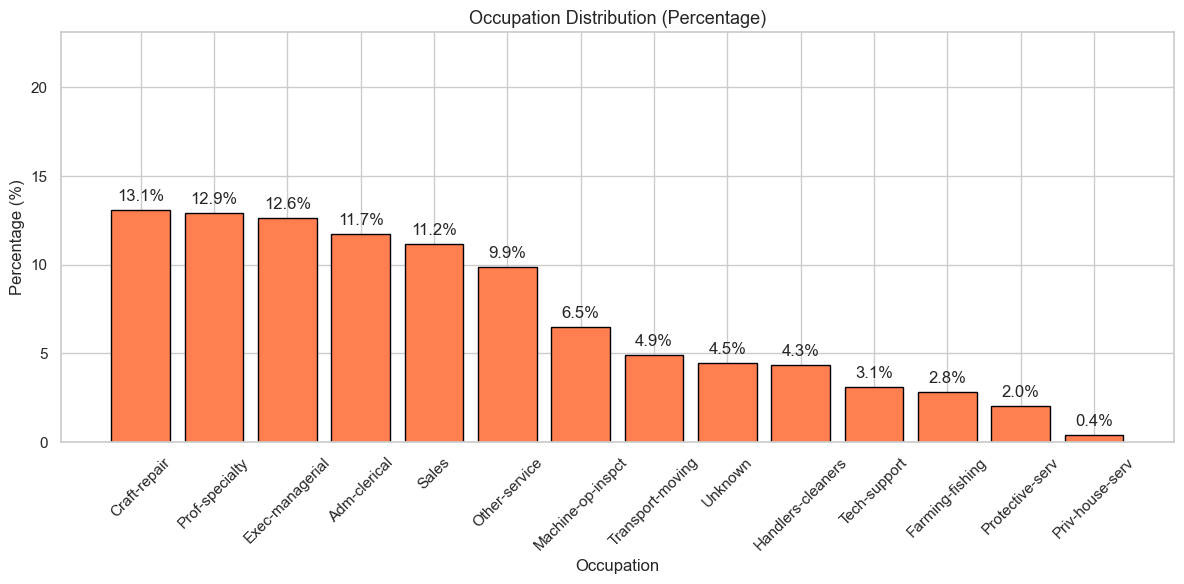

In [1452]:
# Calculate percentage distribution
marital_percent = df['occupation'].value_counts(normalize=True) * 100

# Plotting
plt.figure(figsize=(12, 6))
bars = plt.bar(marital_percent.index, marital_percent.values, color='coral', edgecolor='black')

# Rotate x-axis labels for better visibility (optional)
plt.xticks(rotation=45)

# Add percentage labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f"{height:.1f}%", ha='center')

plt.title('Occupation Distribution (Percentage)', fontsize=13)
plt.ylabel('Percentage (%)')
plt.xlabel('Occupation')
plt.ylim(0, max(marital_percent.values) + 10)  # Buffer for label
plt.tight_layout()
plt.show()

### Interpretation :-

Now i do not have any illogical occupation category names as i have corrected the issues.

Also as i mentioned earlier that a **Good Thing** which I noticed for this colum is that the **Data is Almost "Balanced" in all the Categories** like it starts from 5845 and i can see that there is not much drop in frequency or "Percentages" as seen in the above visualization meaning the differences in the frequency / percentage of some handful categories is not dominating but rather almost all have an equal proprotion which is good which basically tells me that all most every category has substantial amount of data in it and there are not much differences which gets me to the conclusion that the data is not highly imbalance which is good for our "Machine Learning Model" it will be able to learn the patterns in a very good manner without getting "Biased" for any category which has more data.

In [1453]:
df['occupation'].dtype  # The data type of this column is "object" which now i will convert to "category".

dtype('O')

In [1454]:
df['occupation'] = df['occupation'].astype('category')  # Converting the columns data type to "category".

In [1455]:
df['occupation'].dtype  # The data type of this column "occupation" is now correct which is "category".

CategoricalDtype(categories=['Adm-clerical', 'Craft-repair', 'Exec-managerial',
                  'Farming-fishing', 'Handlers-cleaners', 'Machine-op-inspct',
                  'Other-service', 'Priv-house-serv', 'Prof-specialty',
                  'Protective-serv', 'Sales', 'Tech-support',
                  'Transport-moving', 'Unknown'],
, ordered=False, categories_dtype=object)

### Conclusion for Data Preprocessing of column "Occupation" :-

With this i have **preprocessed the data for the column "Occupation"** went through all the essential things like missing data , outliers , data distribution etc.. also through visualizations i observed the datas characteristics , distribution and patterns.

Most Importantly this column had **"Two Inconsistencies"** where i replaced one occupation category which was "?" with "Unknown" and dropped rows in entire dataframe wherever the occupation was "Armed-Forces".

With this i have preprocessed the data for the column "Occupation" and now **it can be used for any further processes.**

## 4.7 Data Preprocessing for column "relationship" :-

In [1456]:
df.columns  # This will display all the column names present in the dataframe of "df".

Index(['age', 'workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country', 'income'],
      dtype='object')

In [1457]:
df.shape  # I have 44,606 Rows and 13 columns in the dataframe "df".

(44606, 13)

In [1458]:
df['relationship']  # This is the column now i will be understanding in detail about and also preprocessing it parallelly.

0        Own-child
1          Husband
2          Husband
3          Husband
4        Own-child
           ...    
48837         Wife
48838      Husband
48839    Unmarried
48840    Own-child
48841         Wife
Name: relationship, Length: 44606, dtype: object

In [1459]:
df['relationship'].isna().sum()  # For this column as well i have no missing data.

0

In [1460]:
df['relationship'].value_counts()  # Seeing the unique categories data in this column and their respective frequencies.

relationship
Husband           17696
Not-in-family     11469
Own-child          7006
Unmarried          4841
Wife               2211
Other-relative     1383
Name: count, dtype: int64

#### This column tells us how the person (the row) is related to the "head of the household."

In the original dataset (which comes from census or income data), each record is an individual, and this field describes their relationship within their household not to you or to the government, but to their family structure at home.

So in simple the relationship column tells us how each person is related to the head of their household — like husband, wife, child, or someone else — which helps understand family structure and living arrangement.

In [1461]:
df['relationship'].dtype  # The data type of this column is "object" which now i will convert to "category".

dtype('O')

In [1462]:
df['relationship'] = df['relationship'].astype('category')  # Converting the columns data type to "category".

In [1463]:
df['relationship'].dtype  # The data type of this column "relationship" is now correct which is "category".

CategoricalDtype(categories=['Husband', 'Not-in-family', 'Other-relative', 'Own-child',
                  'Unmarried', 'Wife'],
, ordered=False, categories_dtype=object)

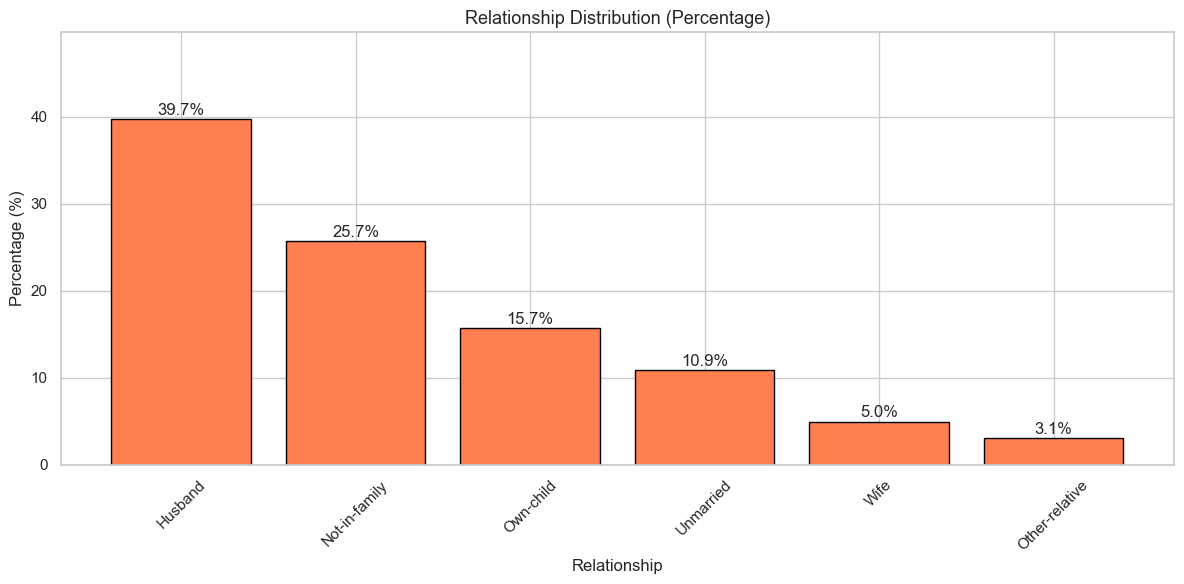

In [1464]:
# Calculate percentage distribution
marital_percent = df['relationship'].value_counts(normalize=True) * 100

# Plotting
plt.figure(figsize=(12, 6))
bars = plt.bar(marital_percent.index, marital_percent.values, color='coral', edgecolor='black')

# Rotate x-axis labels for better visibility (optional)
plt.xticks(rotation=45)

# Add percentage labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f"{height:.1f}%", ha='center')

plt.title('Relationship Distribution (Percentage)', fontsize=13)
plt.ylabel('Percentage (%)')
plt.xlabel('Relationship')
plt.ylim(0, max(marital_percent.values) + 10)  # Buffer for label
plt.tight_layout()
plt.show()

---> So the distribution looks fine to me and logical as it resonates with real world so no need to chaneg over here.

### Conclusion for Data Preprocessing of column "relationship" :-

With this i have **preprocessed the data for the column "Relationship"**.

There were no problems just this column had **"One Small Inconsistency"** which was incorrect data type "object" which i converted to corect which is "category".

With this i have preprocessed the data for the column "Occupation" and now **it can be used for any further processes.**

## 4.8 Data Preprocessing for column "race" :-

In [1465]:
df.columns  # This will display all the column names present in the dataframe of "df".

Index(['age', 'workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country', 'income'],
      dtype='object')

In [1466]:
df['race']  # This is the column now i will be understanding in detail about and also preprocessing it parallelly.

0        Black
1        White
2        White
3        Black
4        White
         ...  
48837    White
48838    White
48839    White
48840    White
48841    White
Name: race, Length: 44606, dtype: object

In [1467]:
df['race'].isna().sum()  # For this column as well i have no missing data.

0

In [1468]:
df['race'].value_counts()  # Seeing the frequency counts.

race
White                 37979
Black                  4360
Asian-Pac-Islander     1433
Amer-Indian-Eskimo      448
Other                   386
Name: count, dtype: int64

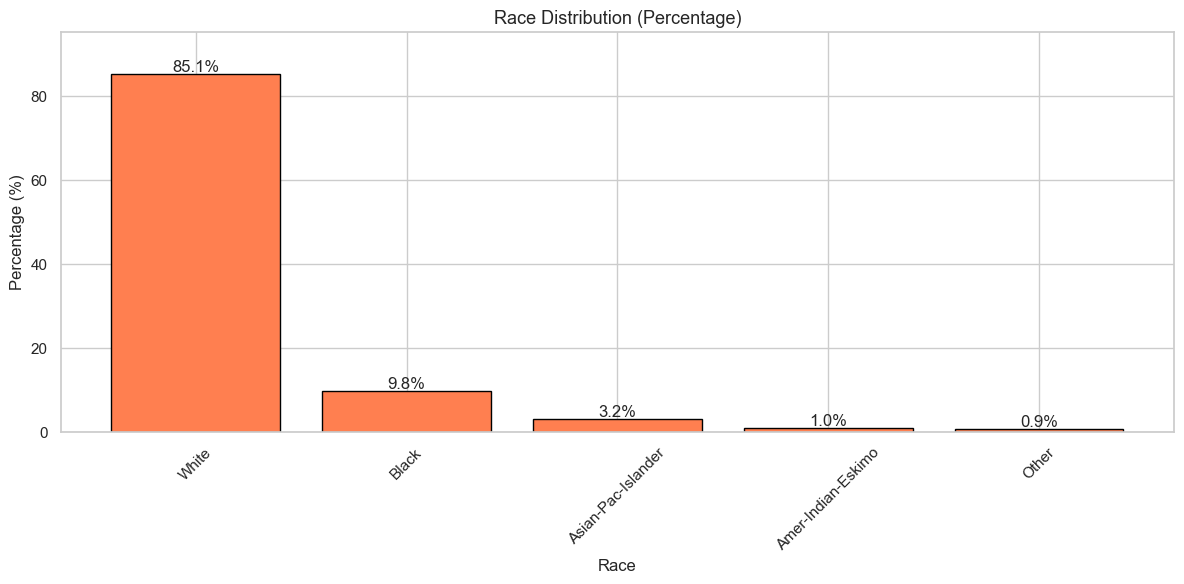

In [1469]:
# Calculate percentage distribution
marital_percent = df['race'].value_counts(normalize=True) * 100

# Plotting
plt.figure(figsize=(12, 6))
bars = plt.bar(marital_percent.index, marital_percent.values, color='coral', edgecolor='black')

# Rotate x-axis labels for better visibility (optional)
plt.xticks(rotation=45)

# Add percentage labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f"{height:.1f}%", ha='center')

plt.title('Race Distribution (Percentage)', fontsize=13)
plt.ylabel('Percentage (%)')
plt.xlabel('Race')
plt.ylim(0, max(marital_percent.values) + 10)  # Buffer for label
plt.tight_layout()
plt.show()

---> By looking at the above results of value counts ( frequency ) results i can confidentaly say that the data is **Imbalance** but once again because this data might be collected in US hence they have the instances of "white" high therefore then this imbalance in nature of data becomes not a problem also if i make any changes in this that will aletr the data and create **Biasness** hence i have decided that i will keep the data as it is without doing any changes.

In [1470]:
df['race'].dtype  # The data type of this column is "object" which now i will convert to "category".

dtype('O')

In [1471]:
df['race'] = df['race'].astype('category')  # Converting the columns data type to "category".

In [1472]:
df['race'].dtype  # The data type of this column "race" is now correct which is "category".

CategoricalDtype(categories=['Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'Other',
                  'White'],
, ordered=False, categories_dtype=object)

### Conclusion for Data Preprocessing of column "race" :-

With this i have **preprocessed the data for the column "Race"**.

There were no problems just this column had **"One Small Inconsistency"** which was incorrect data type "object" which i converted to corect which is "category".

With this i have preprocessed the data for the column "Race" and now **it can be used for any further processes.**

## 4.9 Data Preprocessing for column "gender" :-

In [1473]:
df.columns  # This will display all the column names present in the dataframe of "df".

Index(['age', 'workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country', 'income'],
      dtype='object')

In [1474]:
df['gender']  # This is the column now i will be understanding in detail about and also preprocessing it parallelly.

0          Male
1          Male
2          Male
3          Male
4        Female
          ...  
48837    Female
48838      Male
48839    Female
48840      Male
48841    Female
Name: gender, Length: 44606, dtype: object

In [1475]:
df['gender'].isna().sum()  # There are no null values ( missing data ) present in this column also.

0

In [1476]:
df['gender'].value_counts()  # Seeing the frequency counts.

gender
Male      29863
Female    14743
Name: count, dtype: int64

---> The column contains very simple data in it and has two categories which is **"Male"** and **"Female"** i can see that the "Males" are more in relation to "Females" suggesting me that the data is "Imbalanced" but this once again according to me **Resonates With Real World** because we always know that we have a probability of males working higher in comparsion with females irrespective of which country it is america , india etc.. so i will hence not change this data and keep it as it is.

In [1477]:
df['gender'].mode()  # "Male" is the mode as expected.

0    Male
Name: gender, dtype: object

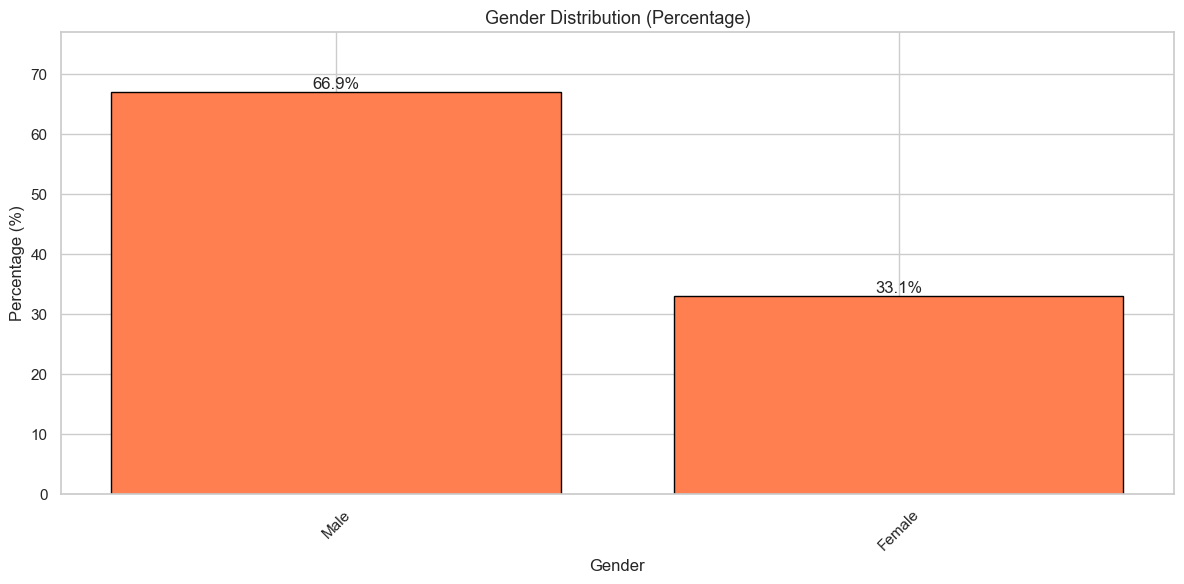

In [1478]:
# Calculate percentage distribution
marital_percent = df['gender'].value_counts(normalize=True) * 100

# Plotting
plt.figure(figsize=(12, 6))
bars = plt.bar(marital_percent.index, marital_percent.values, color='coral', edgecolor='black')

# Rotate x-axis labels for better visibility (optional)
plt.xticks(rotation=45)

# Add percentage labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f"{height:.1f}%", ha='center')

plt.title('Gender Distribution (Percentage)', fontsize=13)
plt.ylabel('Percentage (%)')
plt.xlabel('Gender')
plt.ylim(0, max(marital_percent.values) + 10)  # Buffer for label
plt.tight_layout()
plt.show()

In [1479]:
df['gender'].dtype  # The data type of this column is "object" which now i will convert to "category".

dtype('O')

In [1480]:
df['gender'] = df['gender'].astype('category')  # Converting the columns data type to "category".

In [1481]:
df['gender'].dtype  # The data type of this column "race" is now correct which is "category".

CategoricalDtype(categories=['Female', 'Male'], ordered=False, categories_dtype=object)

### Conclusion for Data Preprocessing of column "gender" :-

With this i have **preprocessed the data for the column "Gender"**.

There were no problems just this column had **"One Small Inconsistency"** which was incorrect data type "object" which i converted to corect which is "category".

With this i have preprocessed the data for the column "gender" and now **it can be used for any further processes.**

## 4.10 Data Preprocessing for column "capital-gain" :-

In [1482]:
df.columns  # This will display all the column names present in the dataframe of "df".

Index(['age', 'workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country', 'income'],
      dtype='object')

In [1483]:
df['capital-gain']  # This is the column now i will be understanding in detail about and also preprocessing it parallelly.

0            0
1            0
2            0
3         7688
4            0
         ...  
48837        0
48838        0
48839        0
48840        0
48841    15024
Name: capital-gain, Length: 44606, dtype: int64

In [1484]:
df['capital-gain'].dtype  # The data type for this column is "int64" which is totally valid and correct as it holds numerical integer data.

dtype('int64')

In [1485]:
# Filtering the dataframe according to wherever the capital gain is 0 and then taking value counts of income
df [ df [ "capital-gain" ] == 0 ] [ "income" ].value_counts ( )

income
<=50K    32510
>50K      8599
Name: count, dtype: int64

In [1486]:
# Filtering the dataframe according to wherever the capital gain is gretare than 0 and then taking value counts of income
df [ df [ "capital-gain" ] > 0 ] [ "income" ].value_counts ( )

income
>50K     2231
<=50K    1266
Name: count, dtype: int64

In [1487]:
# Filtering the dataframe according to wherever the capital gain is 0 and then calculating percentage for unique categories in income
df [ df [ "capital-gain" ] == 0 ] [ "income" ].value_counts ( normalize = True ) * 100

income
<=50K    79.082439
>50K     20.917561
Name: proportion, dtype: float64

In [1488]:
# Filtering the dataframe according to wherever the capital gain is greater than 0 and then calculating percentage for unique categories in income
df [ df [ "capital-gain" ] > 0 ] [ "income" ].value_counts ( normalize = True ) * 100

income
>50K     63.797541
<=50K    36.202459
Name: proportion, dtype: float64

In [1489]:
df.groupby('income')['capital-gain'].mean()  # I did groupby according to column income and then took average of capital gain.

income
<=50K     134.684895
>50K     3873.117913
Name: capital-gain, dtype: float64

### Understanding the `capital-gain` Column

Before jumping into any preprocessing, I wanted to pause and properly understand what the `capital-gain` column actually represents.

In simple terms, **`capital-gain` refers to the profit a person earns by selling a capital asset** (like property, stocks, or other investments) at a higher price than they purchased it. For example, if someone buys a property for ₹5 lakhs and sells it for ₹8 lakhs, the ₹3 lakhs difference is considered a capital gain.

This is **not a regular income source** like a salary it's usually a one-time or occasional gain. That’s why most of the values in this column are `0`, and only a few individuals have non-zero values.


### My Initial Thought

Initially, I believed this column might not be very useful. My reasoning was:

> “A person’s income should depend on factors like education, age, work experience, and occupation. How can a random one-time gain affect their income classification?”

So I considered dropping the column entirely.


### But I Had Doubts...

To be sure, I researched how others have treated this column in similar projects. Many sources considered `capital-gain` useful  that made me curious.

To validate this, I ran a few logical checks on the dataset (as shown in code above). I divided the dataset into two groups based on whether a person had a capital gain or not, and then checked how income was distributed in each group.


### What I Found

**Among people who had `capital-gain = 0`:**

- 79.08% belonged to the **low-income group** (`<=50K`)
- 20.91% belonged to the **high-income group** (`>50K`)

**Among people who had `capital-gain > 0`:**

- 36.20% belonged to the **low-income group**
- 63.79% belonged to the **high-income group**

### Final Conclusion

This was **very insightful** it showed a strong correlation between capital gains and higher income.

> Even though most people don’t report capital gains, **those who do are far more likely to be in the high-income group (`>50K`) because the capital gain which they earn is `added into their final income` hence it strongly affects it.**.

So instead of dropping this column, I’ve now concluded that **`capital-gain` is a valuable predictor** and should be **retained** for modeling purposes.

I will now proceed with preprocessing this column accordingly.

In [1490]:
df [ "capital-gain" ].isna().sum()  # There are no missing data present in this column.

0

In [1491]:
df [ "capital-gain" ].shape  # There are total of 44606 people in this dataset.

(44606,)

In [1492]:
df [ df [ "capital-gain" ] == 0 ].shape [ 0 ]  # There are 41,109 people who have "No Capital Gain".

41109

In [1493]:
( df [ df [ "capital-gain" ] == 0 ].shape [ 0 ] /  df [ "capital-gain" ].shape [ 0 ] ) * 100  # 92.16% of people have "No Capital Gain".

92.16024750033628

In [1494]:
df [ df [ "capital-gain" ] > 0 ].shape  # There are 3,497 people who have "Capital Gain".

(3497, 13)

In [1495]:
( df [ df [ "capital-gain" ] > 0 ].shape [ 0 ] /  df [ "capital-gain" ].shape [ 0 ] ) * 100  # 7.83% of people have "Capital Gain".

7.839752499663723

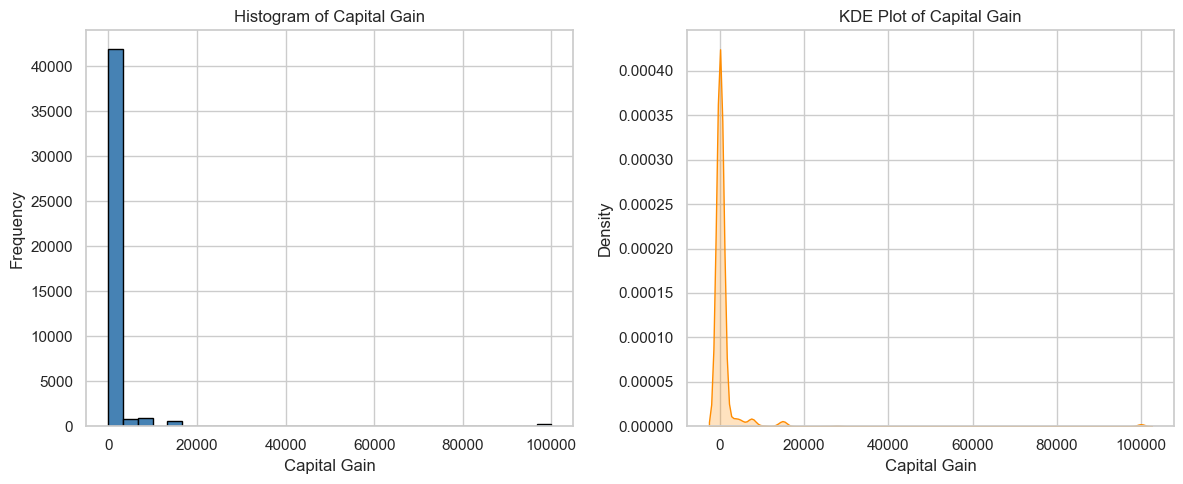

In [1496]:
# Create figure with 2 side-by-side plots
fig, axes = plt.subplots(ncols=2, figsize=(12, 5))

# Plot histogram on the first axis
axes[0].hist(df["capital-gain"], bins=30, color='steelblue', edgecolor='black')
axes[0].set_title('Histogram of Capital Gain', fontsize=12)
axes[0].set_xlabel('Capital Gain')
axes[0].set_ylabel('Frequency')

# Plot KDE on the second axis
sns.kdeplot(data=df, x='capital-gain', fill= True, color='darkorange', ax=axes[1])
axes[1].set_title('KDE Plot of Capital Gain', fontsize=12)
axes[1].set_xlabel('Capital Gain')
axes[1].set_ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()

In [1497]:
df["capital-gain"].skew()  # Seeing the skenwess value which is 12 meaning the data is very "highly positively skewed".

12.081305006399914

### Interpretation :-

As i can clearly see from the above two visualizations which are "Histogram" and "KDE Plot" that the data is **"Heavily Positively Skewed"** most of the people have a capital gain of 0 and only some have greater than 0 and very handful of them have very high capital gain which is causing the **Distortion in the Data** but i know that those are **"Statistcial Outliers"** and not **"Real Outliers"** as gains from capital can really be high so i will not remove those outliers data as they are valid only.

In [1498]:
df["capital-gain"].describe()  # This will provide me Rich Statistical Insights for the column "capital-gain".

count    44606.000000
mean      1042.348204
std       7381.120355
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64

### Interpretation :-

The insights which i got from above two visualizations were 100% correct i can say this by looking at the above results of "Statistical Summary" :-

- I can clearly see that there are **Outliers** because i can see that there is a **Huge difference in the value of Mean ( 1042 ) and Median ( 0 ).**

- The **Standard Deviation is High** suggesting me that the data is very spread out which actually is as i noticed it in "KDE Plot".

- The **Dominance of 0 ( Mode )** in Quartile 1 , Quartile 2 as well as Quartile 3 i can see all the three quartiles have value 0 it tells me that **75% of the people have No - Zero Capital Gain**.

- Lastly the **"Statistical Outlier" is 99999**.

I will investigate this outlier now through filtering the data and make sure that is it even a "Real Outlier" or not ?

In [1499]:
df[df["capital-gain"] == 99999]  # Filtered the dataframe according to wherever the column "capital-gain" is equal to 99999.

,age,workclass,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
83,44,Self-emp-inc,Graduate,Married-civ-spouse,Craft-repair,Husband,White,Male,99999,0,50,?,>50K
346,39,Private,Graduate,Divorced,Exec-managerial,Unmarried,Black,Female,99999,0,40,United-States,>50K
357,50,Self-emp-not-inc,Prof-school,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,80,United-States,>50K
418,54,Self-emp-inc,Prof-school,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,40,United-States,>50K
692,41,Private,Masters,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,55,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47392,22,Self-emp-not-inc,Graduate,Never-married,Sales,Own-child,Black,Male,99999,0,55,United-States,>50K
48109,47,Private,Masters,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,55,United-States,>50K
48253,43,Self-emp-inc,Prof-school,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,40,United-States,>50K
48519,47,Private,Prof-school,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,40,United-States,>50K


### Interpretation :-

---> No after seeing the above results **My Verdict is that the "capital-gain" value 99999 is "Not an Outlier"** why because though the data is Static / Same for 10 rows of columns "income" , ""capital-gain" , but in all the other columns i am able to see variations in data meaning simply this data is valid it is not an error it is just a "Statistical Outlier" but not a "Real Outlier".

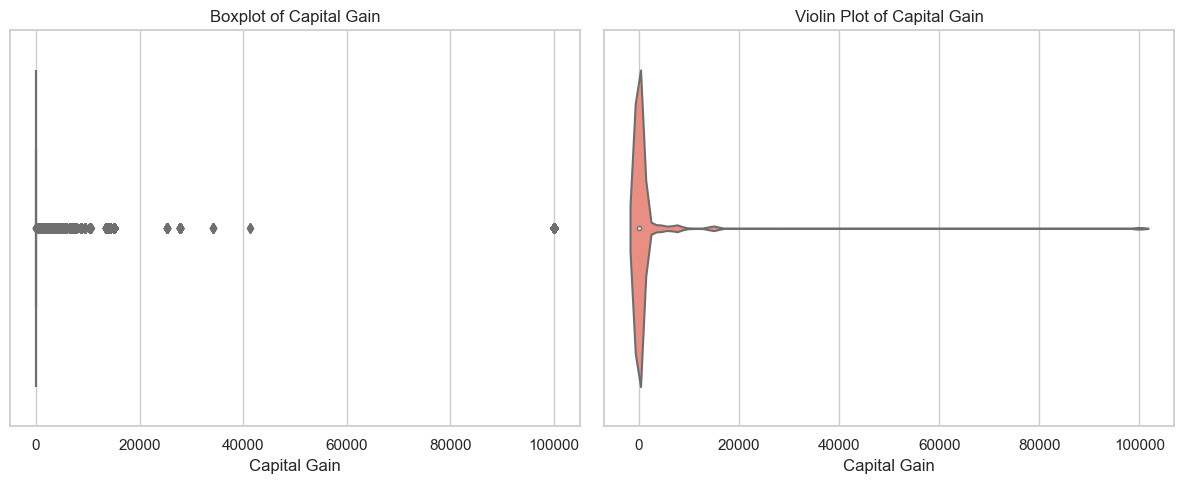

In [1500]:
# Create figure with 2 subplots
fig, axes = plt.subplots(ncols=2, figsize=(12, 5))

# Boxplot
sns.boxplot(x=df['capital-gain'], ax=axes[0], color='skyblue')
axes[0].set_title('Boxplot of Capital Gain', fontsize=12)
axes[0].set_xlabel('Capital Gain')

# Violin Plot
sns.violinplot(x=df['capital-gain'], ax=axes[1], inner='box', color='salmon')
axes[1].set_title('Violin Plot of Capital Gain', fontsize=12)
axes[1].set_xlabel('Capital Gain')

# Layout
plt.tight_layout()
plt.show()

---> The "Boxplot" and the "Violin Plot" both are affected because of the "Statistical Outliers" but i have already got a very good understanding and insights about the distribution of the data for the column "capital-gain" from the previous two visualizations which were "Histogram" and "KDE Plot".

### Conclusion for Data Preprocessing of column "capital-gain" :-

With this i have **preprocessed the data for the column "capital-gain"** went through all the essential things like missing data , outliers , data distribution etc.. also through visualizations i observed the datas characteristics , distribution and patterns.

Most Importantly for this column i  **"Discoverd that it affects thec target column of "income" and it had outliers but they were Statistical Outliers and Not Actual Outliers"**.

With this i have preprocessed the data for the column "capital-gain" and now **it can be used for any further processes.**

## 4.11 Data Preprocessing for column "capital-loss" :-

In [1501]:
df.columns  # This will display all the column names present in the dataframe of "df".

Index(['age', 'workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country', 'income'],
      dtype='object')

In [1502]:
df['capital-loss'].sample ( 20 )  # This is the column now i will be understanding in detail about and also preprocessing it parallelly.

11065       0
7501        0
45341       0
18783       0
5605        0
16785       0
4855     1887
16415       0
8517        0
23739       0
32198       0
35696       0
23995       0
6902        0
18083       0
38144       0
45105       0
45756       0
18117       0
9627        0
Name: capital-loss, dtype: int64

In [1503]:
df['capital-loss'].dtype  # The data type for this column is "int64" which is totally valid and correct as it holds numerical integer data.

dtype('int64')

### What is capital-loss in this dataset ?

Just like capital-gain, which represents profit from selling an asset (like a stock, property, etc.), **the capital-loss column refers to money `lost` due to the sale of such capital assets at a price lower than the purchase price.**

So, for example:

If someone bought a stock at ₹10,000 and sold it at ₹8,000 → Capital Loss = ₹2,000.

This gets reflected in this column.

It shows **investment-related losses**, often outside regular salary or business income hence, it’s listed separately.

In [1504]:
df[df['capital-loss'] > 0].shape [0]  # So i can see that there are 2079 instances where capital loss is greter than 0.

2079

So i can see that there are 2079 instances where capital loss is greter than 0.

So , what my understanding tells me that if a person had "capital-loss > 0 then they should have a "profit-gain == 0" so if these both number of instances ( rows match ) it means that the data present in both the column is correct and now i will check this only by filtering data.

In [1505]:
# Filtering data according to wherever 'capital-loss' > 0 and 'profit-gain' == 0
df[( df['capital-loss'] > 0 ) & ( df['capital-gain'] == 0 ) ].shape [0]

2079

---> The results are 2079 only "it is Matching" so , with this **"I have "Validated" that the data present in both the column 'capital-loss' and 'capital-gain' is totally correct and i can use them for further processes"**.

In [1506]:
df['capital-loss'].isna().sum()  # There are no missing data present in this column as well.

0

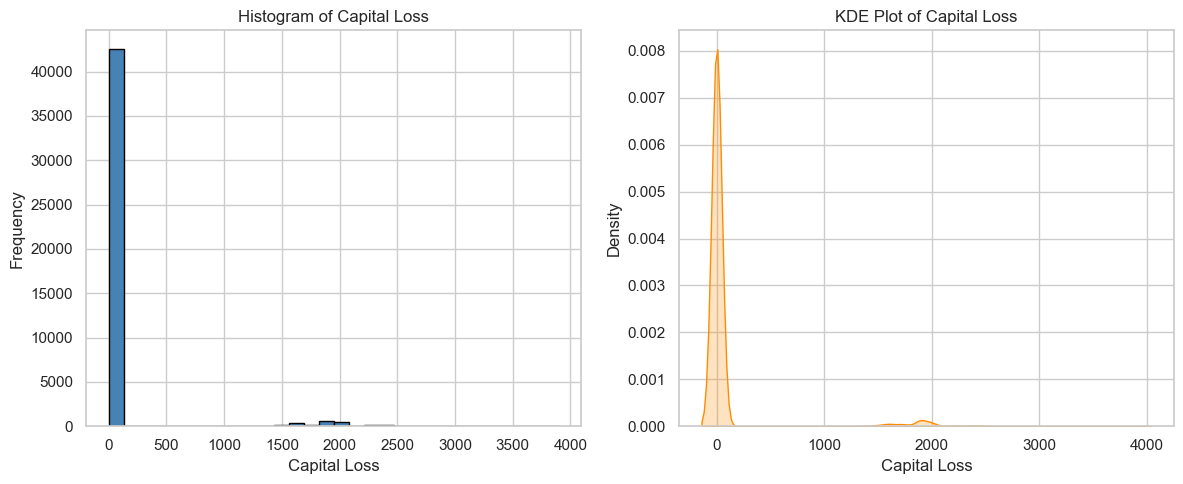

In [1507]:
# Create figure with 2 side-by-side plots
fig, axes = plt.subplots(ncols=2, figsize=(12, 5))

# Plot histogram on the first axis
axes[0].hist(df["capital-loss"], bins=30, color='steelblue', edgecolor='black')
axes[0].set_title('Histogram of Capital Loss', fontsize=12)
axes[0].set_xlabel('Capital Loss')
axes[0].set_ylabel('Frequency')

# Plot KDE on the second axis
sns.kdeplot(data=df, x='capital-loss', fill= True, color='darkorange', ax=axes[1])
axes[1].set_title('KDE Plot of Capital Loss', fontsize=12)
axes[1].set_xlabel('Capital Loss')
axes[1].set_ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()

In [1508]:
df["capital-loss"].skew()  # The skenwess value for "capital-loss" is 4 which is "High".

4.534189061445579

### Interpretation :-

The same pattern which i had seen for the previous column of "capital-gain" the exact patterns is for the current column "capital-loss" also i can clearly see that from the above two visualizations **"Histogram"** and **"KDE Plot"** that here also the data is **"Highly Positively Skewed"** majority of the values are on the lower side and few only are on the higher side ( *NOTE :- Although the values are in positive but in actual these values are **Negative** because they represent "Loss" and not "Gain" )* which is causing the **Distortion** in the data. Again i can clearly see that **majority of the people have No "capital-loss"** , many data points are on value 0 indicating that the 0 is mode. And once again i feel like although there are some very high "capital-loss" but i cannot remove that those are just "Statistical Outliers" and not "Real Outliers" because in real world it is very common to have "Massive Loss" hence i will not remove these data they are accurate only.

In [1509]:
df["capital-loss"].describe()  # This will provide me the "Statistical Summary" for the "capital-loss" data.

count    44606.000000
mean        86.707707
std        399.067933
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       3900.000000
Name: capital-loss, dtype: float64

### Interpretation :-

The insights which i got from above two visualizations were 100% correct i can say this by looking at the above results of "Statistical Summary" :-

- I can clearly see that there are **Outliers** because i can see that there is a **Huge difference in the value of Mean ( 86.70 ) and Median ( 0.0 ).**

- The **Standard Deviation is High ( 399.06 )** suggesting me that the data is very spread out which actually is as i noticed it in "KDE Plot".

- The **Dominance of 0 ( Mode )** in Quartile 1 , Quartile 2 as well as Quartile 3 i can see all the three quartiles have value 0 it tells me that **75% of the people have No - Zero Capital Loss**.

- Lastly the **"Statistical Outlier" is 3900**.

I will investigate this outlier now through filtering the data and make sure that is it even a "Real Outlier" or not although i already know that these are not real outliers but i just want to be 100% sure hence i will do this validation.

In [1510]:
df["capital-loss"].mode()  # As expected the mode is value 0. Meaning majority of the people have No "Zero" "capital-loss".

0    0
Name: capital-loss, dtype: int64

In [1511]:
df["capital-loss"].shape[0]  # So the tptal number of rows or i can say people in the dataset are 44606.

44606

In [1512]:
( df[df["capital-loss"] == 0 ].shape[0] / df["capital-loss"].shape[0] ) * 100  # 95.33% of the people have "No Zero Capital Loss".

95.33919203694569

In [1513]:
( df[df["capital-loss"] > 0 ].shape[0] / df["capital-loss"].shape[0] ) * 100  # 4.66% of the people have "A Capital Loss of greater than 0".

4.660807963054298

Out of 100% , **95.33%** of the people have "No Zero Capital Loss".

Out of 100% , **4.66%** of the people have "A Capital Loss of greater than 0".

---> This basically tells me that **"Majority Of the People did no had any "Capital Loss"**.

In [1514]:
# Filtering the dataframe according to wherever the "capital-loss" is 3900 exactly
df[df['capital-loss'] == 3900 ]  # This is the "Statistical Oultier" so i just want to validate that is it wrong or correct through observation.

,age,workclass,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
36697,54,Private,Elementary,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
40083,41,Private,Graduate,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


By looking at the above Results **I Conclude That --> the value of "capital-loss" "3900" is just a "Statistical Outlier" and "Not a Real Outlier" exactly what i had expected and stated before** , i am saying this on the basis of after observing the results / output of the above filtered dataframe :-

- Firstly , i can see that both the rows where the "capital-loss is 3900" their "income is less than or equal to 50" which makes a lot of sense that the ones who suffered loss they would not have a high income which in our data is denoted by > 50k.

- Secondly , i can see that the "capital-gain is 0" which was expected as they cannot have a "capital-gain" and "capital-loss" together.

- Third , There are fluctuations / variations in every row and column of data indicating that the data has not errors.

With this **I have "Validated" that the "capital-loss" value "3900" is totally valid.**

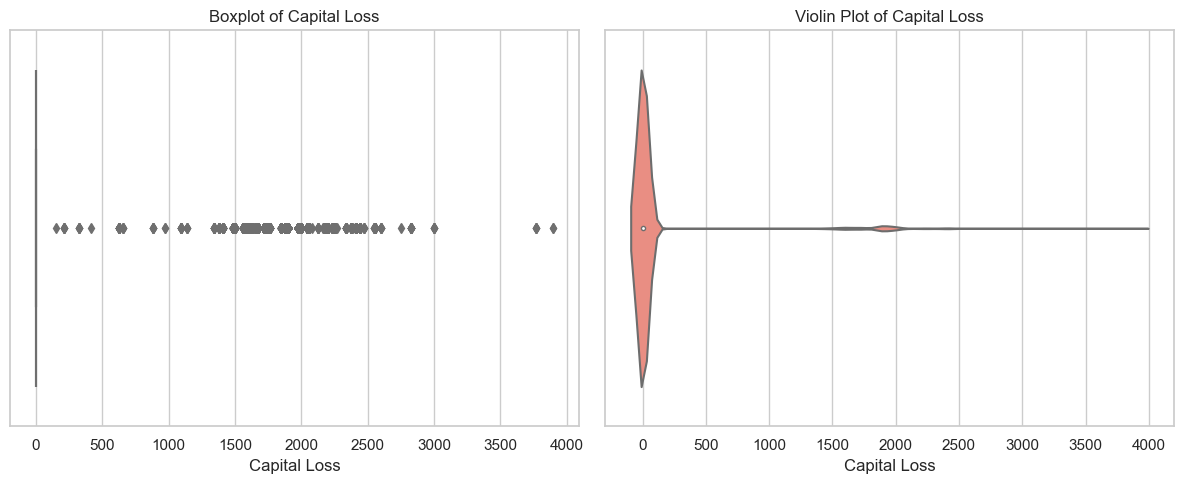

In [1515]:
# Create figure with 2 subplots
fig, axes = plt.subplots(ncols=2, figsize=(12, 5))

# Boxplot
sns.boxplot(x=df['capital-loss'], ax=axes[0], color='skyblue')
axes[0].set_title('Boxplot of Capital Loss', fontsize=12)
axes[0].set_xlabel('Capital Loss')

# Violin Plot
sns.violinplot(x=df['capital-loss'], ax=axes[1], inner='box', color='salmon')
axes[1].set_title('Violin Plot of Capital Loss', fontsize=12)
axes[1].set_xlabel('Capital Loss')

# Layout
plt.tight_layout()
plt.show()

---> The "Boxplot" and the "Violin Plot" both are affected because of the "Statistical Outlier" but i have already got a very good understanding and insights about the distribution of the data for the column "capital-loss" from the previous two visualizations which were "Histogram" and "KDE Plot" and also have already "Validated" the outlier data these above two visualizations was just plotted to make my understanding more accurate.

### Conclusion for Data Preprocessing of column "capital-loss" :-

With this i have **preprocessed the data for the column "capital-loss"** went through all the essential things like missing data , outliers , data distribution etc.. also through visualizations i observed the datas characteristics , distribution and patterns.

Most Importantly for this column i  **"Discoverd that even this column affects the target column of "income" and it had outliers but they were Statistical Outliers and Not Actual Outliers"**.

With this i have preprocessed the data for the column "capital-gain" and now **it can be used for any further processes.**

## 4.12 Data Preprocessing for column "hours-per-week" :-

In [1516]:
df.columns  # This will display all the column names present in the dataframe of "df".

Index(['age', 'workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country', 'income'],
      dtype='object')

In [1517]:
df['hours-per-week']  # This is the column now i will be understanding in detail about and also preprocessing it parallelly.

0        40
1        50
2        40
3        40
4        30
         ..
48837    38
48838    40
48839    40
48840    20
48841    40
Name: hours-per-week, Length: 44606, dtype: int64

The column "hours per week" data generally indicates the total number of hours a person works during a standard seven-day week.

In [1518]:
df['hours-per-week'].dtype  # The data type for this column is "int64" which is totally valid and correct as it holds numerical integer data.

dtype('int64')

In [1519]:
df['hours-per-week'].isna().sum()  # There are no missing data for this column as well.

0

In [1520]:
df['hours-per-week'].nunique()  # So number of unique data present in this column is 94 which for a numerical column i feel is pretty less.

94

In [1521]:
df['hours-per-week'].unique()  # I am seeing all the unique data for observing that are there any suspicious data or not ?

array([40, 50, 30, 10, 39, 35, 48, 25, 20, 45, 47, 43, 90, 54, 60, 38, 32,
       36, 18, 24, 44, 56, 28, 16, 41, 22, 55, 14, 33, 37, 12, 70, 15, 75,
       52, 84, 42, 80,  8, 68, 99, 65, 17, 72, 53, 96, 21,  5, 46,  3, 49,
       67, 76, 23,  2, 58, 34,  4, 51, 78, 63,  6, 92, 31,  7, 77, 27, 29,
       85,  1, 13, 26, 19, 98, 62, 66, 57, 11, 59,  9, 64, 73, 61, 88, 89,
       74, 86, 69, 87, 97, 94, 81, 91, 95], dtype=int64)

In [1522]:
df['hours-per-week'].max()  # The max value is "99" which looks "Very Suspicious" to me i will have to look upon this.

99

In [1523]:
df['hours-per-week'].describe()  # This will help in giving a lot of useful "Statistical Insights" for this column.

count    44606.000000
mean        41.267722
std         11.688306
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64

### Interpretation :-

- According to the above results there are **No Outliers** because i can see that there is not a **Huge difference in the value of Mean ( 41.26 ) and Median ( 40.0 ).**

- The **Standard Deviation is Moderate** suggesting me that the data is Moderately spread out.

- The **Dominance of 40s ( Mode )** in Quartile 1 , Quartile 2 as well as Quartile 3 i can see all the three quartiles have value in 40s it tells me that **75% of the people work "45 hours per week"**.

- Lastly the **"I feel the value of 99 is "Outlier" according to me** as it is very impractical to work for 99 hours in a week as no one can work for such a long time and that too every country has some laws regarding how much hours employees can work and the value of 99 is very high.

I will investigate this outlier now through filtering the data and make sure that is it even a "Real Outlier" or not ?

In [1524]:
df[df['hours-per-week'] >= 90 ]  # Filtering the dataframe according to wherever the ""hours-per-week" is greater than or equal to 90.

,age,workclass,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
25,45,Self-emp-not-inc,Graduate,Married-civ-spouse,Craft-repair,Husband,White,Male,7298,0,90,United-States,>50K
384,29,Private,HighSchool,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,99,United-States,>50K
723,35,Self-emp-not-inc,HighSchool,Married-civ-spouse,Craft-repair,Husband,Amer-Indian-Eskimo,Male,0,0,96,United-States,<=50K
810,46,Private,Prof-school,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,90,United-States,<=50K
901,37,Private,Graduate,Married-civ-spouse,Craft-repair,Husband,White,Male,7688,0,99,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47962,43,Private,Graduate,Married-civ-spouse,Craft-repair,Husband,White,Male,0,1902,99,United-States,>50K
47980,43,Self-emp-not-inc,Graduate,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,99,United-States,<=50K
48130,21,Self-emp-not-inc,Associate,Never-married,Farming-fishing,Own-child,White,Male,0,0,98,United-States,<=50K
48750,58,Self-emp-inc,Doctorate,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,?,<=50K


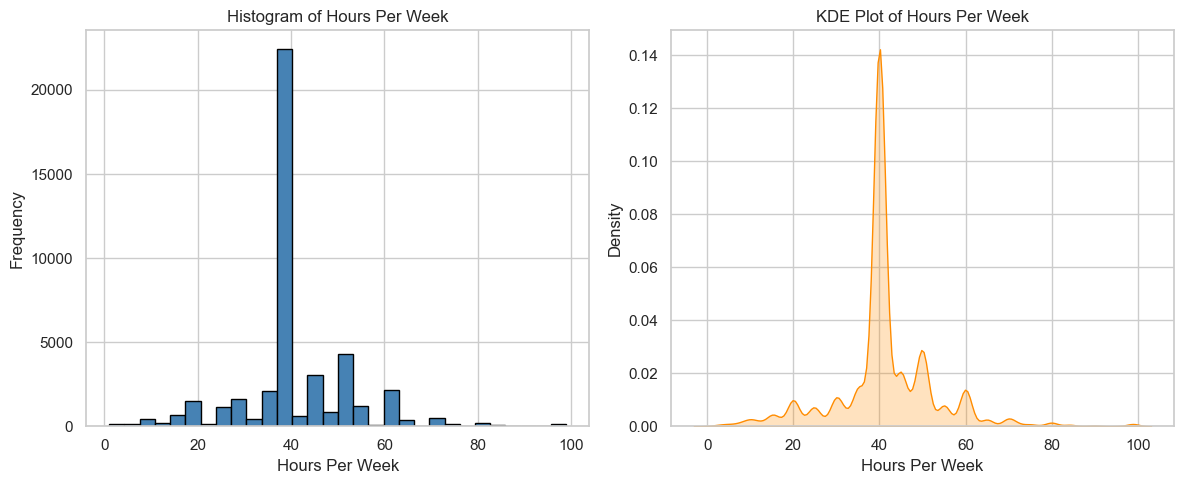

In [1525]:
# Create figure with 2 side-by-side plots
fig, axes = plt.subplots(ncols=2, figsize=(12, 5))

# Plot histogram on the first axis
axes[0].hist(df['hours-per-week'], bins=30, color='steelblue', edgecolor='black')
axes[0].set_title('Histogram of Hours Per Week', fontsize=12)
axes[0].set_xlabel('Hours Per Week')
axes[0].set_ylabel('Frequency')

# Plot KDE on the second axis
sns.kdeplot(data=df, x='hours-per-week', fill= True, color='darkorange', ax=axes[1])
axes[1].set_title('KDE Plot of Hours Per Week', fontsize=12)
axes[1].set_xlabel('Hours Per Week')
axes[1].set_ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()

In [1526]:
df['hours-per-week'].skew()  # The Skewness value is 0.43 which is low as the data is distributed almost evenly.

0.4383766055796753

### ⚙️ Domain Logic: Is 99 Hours Per Week Reasonable?

To answer that, let’s break it down:

- There are **168 hours in a week** (24 × 7).

- Assuming **8 hours of sleep per day**, that’s 56 hours of sleep, **leaving ~112 hours for everything else** (eating, commuting, personal time, and working)

**Working 90–99 hours** a week would mean:

- **~13–14 hours of work every single day, including weekends**.

- **Very little time left for life essentials**.

➡️ **So yes, working 90–99 hours per week is highly impractical**, and in many real-world jobs (except maybe startups or extreme roles), it's **not realistic or sustainable**. `Labor laws` in most countries, including India and the US, `recommend 40–48 hours/week as the standard full-time workload`, with 60–70 often being considered overwork.

So with this i have already got to know that i will have to select a **practical and an accurate threhold** and according to that i will **Remove all the rows in the dataframe wherever the "hours-per-week" exceeds that threshold**.

💡 **I got a very good idea for "Validation" that Maybe I can just compare the high "hourse-per-week" with the frequency distribution of the column "occupation" because around the world it is very sensible that people which are poor and work in low class jobs like farming etc.. they work really for very high hours and for that there are multiple reasons some which i can think is number one they are poor second is that they do not work for organizations or ateast in a controlled body so there is no legislation / supervision on them and they can be easily exploited so i will go with this validation check if i find that the ones who have very high "hours-per-week" but are from loss class jobs "occupation" i will not remove those rows because then they are totally valid and make a lot of sense.** 💡

In [1527]:
df['occupation'].value_counts()  # This is how the frequency distribution of the column "occupation" normally looks.

occupation
Craft-repair         5845
Prof-specialty       5758
Exec-managerial      5638
Adm-clerical         5234
Sales                4974
Other-service        4408
Machine-op-inspct    2885
Transport-moving     2187
Unknown              1997
Handlers-cleaners    1934
Tech-support         1396
Farming-fishing      1266
Protective-serv       908
Priv-house-serv       176
Name: count, dtype: int64

In [1528]:
# Filtering the dataframe according to wherever the ""hours-per-week" is greater than or equal to 90 and then taking value counts of "occupation"
df[df['hours-per-week'] >= 90 ] ['occupation'].value_counts()

occupation
Farming-fishing      34
Prof-specialty       32
Exec-managerial      27
Transport-moving     24
Sales                16
Craft-repair         15
Other-service        14
Unknown              11
Protective-serv       9
Handlers-cleaners     2
Priv-house-serv       2
Tech-support          2
Adm-clerical          1
Machine-op-inspct     1
Name: count, dtype: int64

---> **So , clealr i see a "Pattern" normally the "Farming-fishing" was third last but for "hoursper-week >= 50" the "occupation" "Farming-fishing" is the **Number One** and it makes sense as this is a low class job and people are exploited and hence they work for very high hours in a week.

Some other categories which are high ( example Prof-specialty , Exec-managerial etc.. ) it is because they already have very high frequency in normal unfiltered distribution but overall i see low class jobs occupation more like "Farming-fishing" , "Craft-repair" etc...

**So with this i have "Validated" the data and i will not remove the high hours per week**.

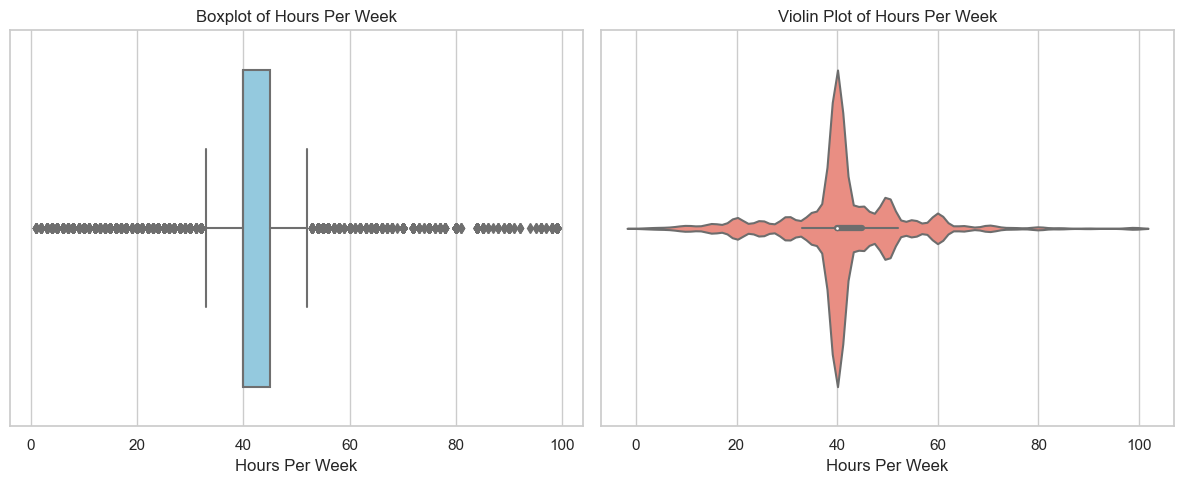

In [1529]:
# Create figure with 2 subplots
fig, axes = plt.subplots(ncols=2, figsize=(12, 5))

# Boxplot
sns.boxplot(x=df['hours-per-week'], ax=axes[0], color='skyblue')
axes[0].set_title('Boxplot of Hours Per Week', fontsize=12)
axes[0].set_xlabel('Hours Per Week')

# Violin Plot
sns.violinplot(x=df['hours-per-week'], ax=axes[1], inner='box', color='salmon')
axes[1].set_title('Violin Plot of Hours Per Week', fontsize=12)
axes[1].set_xlabel('Hours Per Week')

# Layout
plt.tight_layout()
plt.show()

---> The "Boxplot" and the "Violin Plot" both clearly shows that **Majority of the points are concentrated arounf the value of 40** as it is expected because around the world the Standard Hours Per Week is 40 only and as in when the value is going away from 40s positive or negative i can see less data points also i have already got a very good understanding and insights about the distribution of the data for the column "hours-per-week" from the previous two visualizations which were "Histogram" and "KDE Plot" and also have already "Validated" the outlier data these above two visualizations was just plotted to make my understanding more accurate.

### Conclusion for Data Preprocessing of column "hours-per-week" :-

With this i have **preprocessed the data for the column "hours-per-week"** went through all the essential things like missing data , outliers , data distribution etc.. also through visualizations i observed the datas characteristics , distribution and patterns.

Most Importantly for this column i  **"Validated that "High Hours Per Week" though seemes initially suspicious to me i validated that they are correct by comparing them with the data of the column "occupation"**.

With this i have preprocessed the data for the column "hours-per-week" and now **it can be used for any further processes.**

## 4.13 Data Preprocessing for column "native-country" :-

In [1530]:
df.columns  # This will display all the column names present in the dataframe of "df".

Index(['age', 'workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country', 'income'],
      dtype='object')

In [1531]:
df['native-country']  # This is the column now i will be understanding in detail about and also preprocessing it parallelly.

0        United-States
1        United-States
2        United-States
3        United-States
4        United-States
             ...      
48837    United-States
48838    United-States
48839    United-States
48840    United-States
48841    United-States
Name: native-country, Length: 44606, dtype: object

In [1532]:
df['native-country'].isna().sum()  # There are no null values present in this column also.

0

In [1533]:
df['native-country'].nunique()  # There are 42 unique values in this column meaning the "Cardinality is Moderate".

42

In [1534]:
df['native-country'].unique()  # Seeing all the unqiue country names.

array(['United-States', '?', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Jamaica', 'Ecuador',
       'Yugoslavia', 'Hong', 'Greece', 'Hungary', 'Trinadad&Tobago',
       'Scotland', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

---> **Found One Inconsistency which is one country has a name of "`Question Mark ( ? )`" so will once again have to correct it by "Replacing" it with the most logical name without introducing "Bias" in the data.**

In [1535]:
df['native-country'].value_counts()  # Seeing the value counts for unique country names in this column.

native-country
United-States                 39925
Mexico                          922
?                               796
Philippines                     270
Germany                         190
Puerto-Rico                     171
Canada                          151
El-Salvador                     149
India                           146
Cuba                            115
England                         113
China                           112
South                           106
Jamaica                         103
Dominican-Republic              101
Italy                            94
Japan                            90
Guatemala                        85
Vietnam                          82
Columbia                         77
Poland                           77
Haiti                            73
Taiwan                           64
Portugal                         63
Iran                             57
Nicaragua                        47
Greece                           44
Ecuador      

### I Noticed Two Inconsistencies :-

- First , A country which has name of **"Question Mark ( ? )"** i cannot delete it because it has 796 times which is 3rd highest if i do so i will create "Bias" hence i have decided to **Replace it with the name of "Other"** which referes to other country.

- Second i see there is a country which is **"Holand-Netherlands"** and this has **Ocuured just 1 Time so i will remove this one row from dataframe because it has just one data which can cause Machine Learning Problem to not learn data effectively and rather get Confused which can cause affect with wrong prediction for other data points**.

Also one additional thing i see that the **Most Common Native Country is "United-States"** probably because this data might have been collected from America only so thats not a problem in relation to "Imbalance Data".

In [1536]:
df[df['native-country'] == "?" ]  # Filtering the dataframe where the natve country is "?".

,age,workclass,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
19,40,Private,Doctorate,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,45,?,>50K
65,41,Private,Bachelors,Never-married,Other-service,Not-in-family,White,Female,0,0,40,?,<=50K
83,44,Self-emp-inc,Graduate,Married-civ-spouse,Craft-repair,Husband,White,Male,99999,0,50,?,>50K
188,34,State-gov,Bachelors,Married-spouse-absent,Farming-fishing,Not-in-family,Black,Male,0,0,40,?,<=50K
253,42,Federal-gov,Bachelors,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,40,?,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48694,45,Private,Elementary,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,?,<=50K
48730,44,Self-emp-inc,Masters,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,?,>50K
48750,58,Self-emp-inc,Doctorate,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,?,<=50K
48773,42,Self-emp-not-inc,Graduate,Divorced,Sales,Own-child,White,Male,0,0,50,?,<=50K


In [1537]:
df['native-country'] = df['native-country'].replace("?", "Other")  # Replacing the "?' with "Other".

In [1538]:
df[df['native-country'] == "?" ]  # So now there is no natve country with name of "?".

,age,workclass,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income


In [1539]:
df[df['native-country'] == "Other" ]  # But rathere the natve country with name of "?" has now been replaced with name "Other".

,age,workclass,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
19,40,Private,Doctorate,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,45,Other,>50K
65,41,Private,Bachelors,Never-married,Other-service,Not-in-family,White,Female,0,0,40,Other,<=50K
83,44,Self-emp-inc,Graduate,Married-civ-spouse,Craft-repair,Husband,White,Male,99999,0,50,Other,>50K
188,34,State-gov,Bachelors,Married-spouse-absent,Farming-fishing,Not-in-family,Black,Male,0,0,40,Other,<=50K
253,42,Federal-gov,Bachelors,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,40,Other,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48694,45,Private,Elementary,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,Other,<=50K
48730,44,Self-emp-inc,Masters,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,Other,>50K
48750,58,Self-emp-inc,Doctorate,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,Other,<=50K
48773,42,Self-emp-not-inc,Graduate,Divorced,Sales,Own-child,White,Male,0,0,50,Other,<=50K


In [1540]:
df['native-country'].value_counts()  # "?" has been seccessfully replaced with "Other".

native-country
United-States                 39925
Mexico                          922
Other                           796
Philippines                     270
Germany                         190
Puerto-Rico                     171
Canada                          151
El-Salvador                     149
India                           146
Cuba                            115
England                         113
China                           112
South                           106
Jamaica                         103
Dominican-Republic              101
Italy                            94
Japan                            90
Guatemala                        85
Vietnam                          82
Columbia                         77
Poland                           77
Haiti                            73
Taiwan                           64
Portugal                         63
Iran                             57
Nicaragua                        47
Greece                           44
Ecuador      

In [1541]:
df = df[df['native-country'] != "Holand-Netherlands" ]  # Removing the row where the country is "Holand-Netherlands".

In [1542]:
df['native-country'].value_counts()  # The country is "Holand-Netherlands" is no more it has been removed succesfully.

native-country
United-States                 39925
Mexico                          922
Other                           796
Philippines                     270
Germany                         190
Puerto-Rico                     171
Canada                          151
El-Salvador                     149
India                           146
Cuba                            115
England                         113
China                           112
South                           106
Jamaica                         103
Dominican-Republic              101
Italy                            94
Japan                            90
Guatemala                        85
Vietnam                          82
Columbia                         77
Poland                           77
Haiti                            73
Taiwan                           64
Portugal                         63
Iran                             57
Nicaragua                        47
Greece                           44
Ecuador      

In [1543]:
df['native-country'].dtype  # The data type of this column is "object" which now i will convert to "category".

dtype('O')

In [1544]:
df['native-country'] = df['native-country'].astype('category')  # Converting the columns data type to "category".

In [1545]:
df['native-country'].dtype  # The data type of this column "native-country" is now correct which is "category".

CategoricalDtype(categories=['Cambodia', 'Canada', 'China', 'Columbia', 'Cuba',
                  'Dominican-Republic', 'Ecuador', 'El-Salvador', 'England',
                  'France', 'Germany', 'Greece', 'Guatemala', 'Haiti',
                  'Honduras', 'Hong', 'Hungary', 'India', 'Iran', 'Ireland',
                  'Italy', 'Jamaica', 'Japan', 'Laos', 'Mexico', 'Nicaragua',
                  'Other', 'Outlying-US(Guam-USVI-etc)', 'Peru', 'Philippines',
                  'Poland', 'Portugal', 'Puerto-Rico', 'Scotland', 'South',
                  'Taiwan', 'Thailand', 'Trinadad&Tobago', 'United-States',
                  'Vietnam', 'Yugoslavia'],
, ordered=False, categories_dtype=object)

### Conclusion for Data Preprocessing of column "native-country" :-

With this i have **preprocessed the data for the column "hours-per-week"** went through all the essential things like missing data , outliers , data distribution etc.. also through frequency distribution i observed the datas characteristics , distribution and patterns.

Most Importantly for this column i  **"I found "Three Inconsistencies" which were *?* other was *Holand-Netherlands* , lastl was *Incorrect data Type* , i corrected all of these Inconsistencies"**.

With this i have preprocessed the data for the column "native-country" and now **it can be used for any further processes.**

## 4.14 Data Preprocessing for column "income" :-

---> **This is My Target ( Y ) Column , i will just perform some EDA Steps to see is everything ok in this column or not ? If needed i would perfrom Data Preprocessing Also.**

In [1546]:
df.columns  # This will display all the column names present in the dataframe of "df".

Index(['age', 'workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country', 'income'],
      dtype='object')

In [1547]:
df['income']  # This is the column now i will be understanding in detail about and also preprocessing it parallelly.

0        <=50K
1        <=50K
2         >50K
3         >50K
4        <=50K
         ...  
48837    <=50K
48838     >50K
48839    <=50K
48840    <=50K
48841     >50K
Name: income, Length: 44605, dtype: object

In [1548]:
df['income'].nunique()  # I just have two unqiue values.

2

In [1549]:
df['income'].value_counts()  # Seeing the frequency count of unique data in my "Traget Column".

income
<=50K    33775
>50K     10830
Name: count, dtype: int64

### Important things :-

- Firstly , I get to know that Because there are **Just Two Categories "<=50K" and ">50k" it means that *This is a BINARY CLASSIFICATION and i will use BINARY MACHINE LEARNING ALGORITHMS* which can classify data into Two Classes or Catgrories**.

- Secondly , I can clearly see that the data in this column is **"Imbalanced"** But i cannot change anything as it can introduce "Bias" and also this is not wrong because this "Imbalance Data of the column income" Resonates with "Real World" as we more people earning less and less earning more. So everything is ok i will move on.

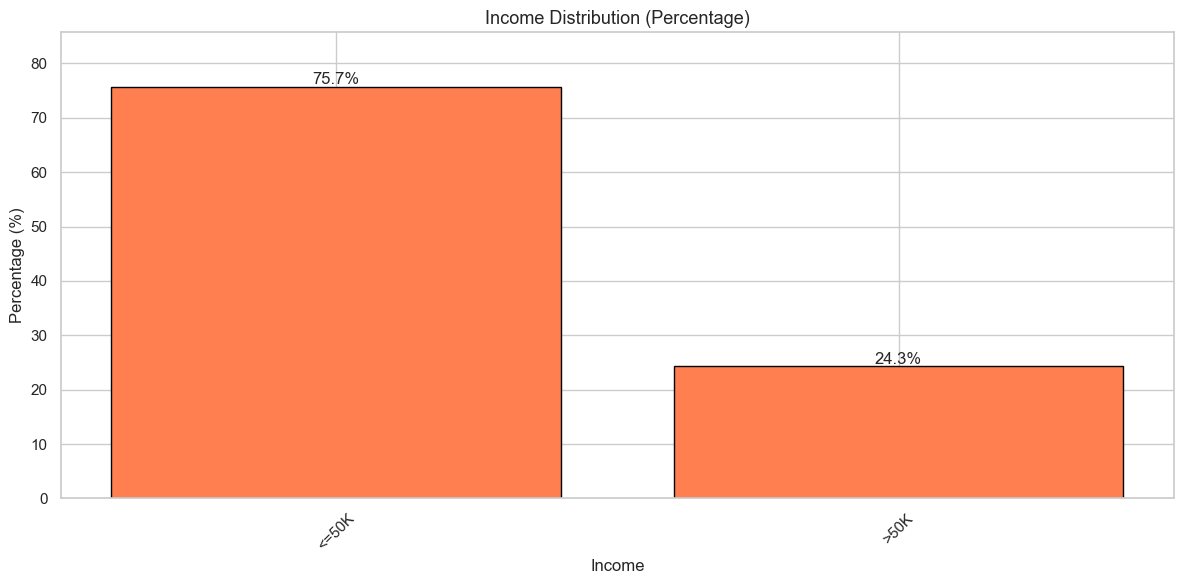

In [1550]:
# Calculate percentage distribution
marital_percent = df['income'].value_counts(normalize=True) * 100

# Plotting
plt.figure(figsize=(12, 6))
bars = plt.bar(marital_percent.index, marital_percent.values, color='coral', edgecolor='black')

# Rotate x-axis labels for better visibility (optional)
plt.xticks(rotation=45)

# Add percentage labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f"{height:.1f}%", ha='center')

plt.title('Income Distribution (Percentage)', fontsize=13)
plt.ylabel('Percentage (%)')
plt.xlabel('Income')
plt.ylim(0, max(marital_percent.values) + 10)  # Buffer for label
plt.tight_layout()
plt.show()

In [1551]:
df['income'].dtype  # The data type of this column is "object" which now i will convert to "category".

dtype('O')

In [1552]:
df['income'] = df['income'].astype('category')  # Converting the columns data type to "category".

In [1553]:
df['income'].dtype  # The data type of this column "income" is now correct which is "category".

CategoricalDtype(categories=['<=50K', '>50K'], ordered=False, categories_dtype=object)

### Conclusion for Data Preprocessing of Target Column "income" :-

With this i have **preprocessed the data for the column "income"** went through all the essential things like missing data , outliers , data distribution etc.. also through frequency distribution i observed the datas characteristics , distribution and patterns.

Most Importantly this column is **The Target ( Y ) Column it contains the data which i want to predict this just had small data inconsistency which i corrected**.

With this i have preprocessed the data for the column "income" and now **it can be used for any further processes.**

### DataFrame Look / Characteristics After EDA and Preprocessing of All the Columns :-

In [1554]:
df  # I am Done now with all the EDA and Preprocessing for all the individual columns in the dataframe.

,age,workclass,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,HighSchool,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,Graduate,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Associate,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Graduate,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Others,Graduate,Never-married,Unknown,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Associate,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,Graduate,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,Graduate,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,Graduate,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [1555]:
df.shape  # So now finally i have 44,605 Rows and 13 Columns.

(44605, 13)

In [1556]:
df.info()  # No Column has Missing Data , Outliers etc.. and also the Data Types are now correct.

# NOTE :- There are "Statistical Ouliers" present but ther are not "Real Outliers" there is difference bewteen these Two Types of Outliers.

<class 'pandas.core.frame.DataFrame'>
Index: 44605 entries, 0 to 48841
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             44605 non-null  int64   
 1   workclass       44605 non-null  category
 2   education       44605 non-null  category
 3   marital-status  44605 non-null  category
 4   occupation      44605 non-null  category
 5   relationship    44605 non-null  category
 6   race            44605 non-null  category
 7   gender          44605 non-null  category
 8   capital-gain    44605 non-null  int64   
 9   capital-loss    44605 non-null  int64   
 10  hours-per-week  44605 non-null  int64   
 11  native-country  44605 non-null  category
 12  income          44605 non-null  category
dtypes: category(9), int64(4)
memory usage: 2.1 MB


In [1557]:
df.describe()  # "Statistical Summary" for only "Numerical Columns".

,age,capital-gain,capital-loss,hours-per-week
count,44605.000000,44605.000000,44605.000000,44605.000000
mean,36.624638,1042.371573,86.660217,41.267750
std,11.227463,7381.201445,398.946342,11.688435
min,18.000000,0.000000,0.000000,1.000000
25%,27.000000,0.000000,0.000000,40.000000
50%,36.000000,0.000000,0.000000,40.000000
75%,45.000000,0.000000,0.000000,45.000000
max,60.000000,99999.000000,3900.000000,99.000000


In [1558]:
df.describe(include='category')  # "Statistical Summary" for only "Catgeorical Columns".

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,44605,44605,44605,44605,44605,44605,44605,44605,44605
unique,7,8,7,14,6,5,2,41,2
top,Private,Graduate,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,<=50K
freq,31764,24843,20229,5845,17696,37978,29863,39925,33775


### FINAL CONCLUSION FOR STEP 4 :-

**With This i am totally done with the "Step 4 which was EDA ( Explorartory Data Analysis )" where i perfromed EDA for each individual column one by one and also if "Performed Data Preprocessing" Now the all the columns are Clean , No Outliers , No Missing Data etc.. and i can use them for further Steps.** 

---
---
---

## 5. Data Encoding ( Converting Data To Numbers ) :-

So Now that my **Data is Fully Preprocessed and Clean** now its time that i will convert my data into numbers because **machine learning models understand only Numerical Data** , if I have any textual or categorical data machines are not able to understand the data and they are not able to Process it and understand patterns from it.

So now I have a **lot of Categorical Columns** and I will now simply **convert this data present in the category columns to Numerical Data** and the columns which are already numerical they will stay as it is because there already having numerical data.

In [1559]:
df.info()  # This is how the dataframe columns data info looks like "Before Encoding".

<class 'pandas.core.frame.DataFrame'>
Index: 44605 entries, 0 to 48841
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             44605 non-null  int64   
 1   workclass       44605 non-null  category
 2   education       44605 non-null  category
 3   marital-status  44605 non-null  category
 4   occupation      44605 non-null  category
 5   relationship    44605 non-null  category
 6   race            44605 non-null  category
 7   gender          44605 non-null  category
 8   capital-gain    44605 non-null  int64   
 9   capital-loss    44605 non-null  int64   
 10  hours-per-week  44605 non-null  int64   
 11  native-country  44605 non-null  category
 12  income          44605 non-null  category
dtypes: category(9), int64(4)
memory usage: 2.1 MB


In [1560]:
# Step: Label Encoding for all object or category columns except the target column

# Importing LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Create a copy of the original DataFrame
df_encoded = df.copy()

# Instantiate the LabelEncoder
le = LabelEncoder()

# I am applying Label Encoding to all object or category columns
# except the target column 'income'
for col in df_encoded.select_dtypes(include=['object', 'category']).columns:
    if col != 'income':  # I am skipping the target column for now
        df_encoded[col] = le.fit_transform(df_encoded[col])

# Preview the result
df_encoded.head()

,age,workclass,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,5,4,5,3,2,1,0,0,40,38,<=50K
1,38,3,4,2,3,0,4,1,0,0,50,38,<=50K
2,28,1,0,2,9,0,4,1,0,0,40,38,>50K
3,44,3,4,2,5,0,2,1,7688,0,40,38,>50K
4,18,2,4,4,13,3,4,0,0,0,30,38,<=50K


**---> All The Catgorical Columns now have been Successfully Encoded - Converted to the Numbers**. I have not encoded the Target Column "income" i will keep it as it is because for interpretation.

In [1561]:
# Step: Validation of Label Encoding

# I want to validate that each categorical column in the original DataFrame
# has been encoded correctly in the encoded DataFrame

# I will first identify all categorical columns (object or category)
cat_columns = df.select_dtypes(include=['object', 'category']).columns

# Now I will compare the number of unique values in the original and encoded DataFrames
for col in cat_columns:
    if col != 'income':  # I am skipping the target column as I have not encoded it
        original_unique = df[col].nunique()
        encoded_unique = df_encoded[col].nunique()
        print(f"Column: {col}")
        print(f"  → Original unique categories: {original_unique}")
        print(f"  → Encoded unique values:      {encoded_unique}")
        if original_unique == encoded_unique:
            print("  ✅ Encoding looks correct.\n")
        else:
            print("  ❌ Something seems off. Please double-check this column.\n")

Column: workclass
  → Original unique categories: 7
  → Encoded unique values:      7
  ✅ Encoding looks correct.

Column: education
  → Original unique categories: 8
  → Encoded unique values:      8
  ✅ Encoding looks correct.

Column: marital-status
  → Original unique categories: 7
  → Encoded unique values:      7
  ✅ Encoding looks correct.

Column: occupation
  → Original unique categories: 14
  → Encoded unique values:      14
  ✅ Encoding looks correct.

Column: relationship
  → Original unique categories: 6
  → Encoded unique values:      6
  ✅ Encoding looks correct.

Column: race
  → Original unique categories: 5
  → Encoded unique values:      5
  ✅ Encoding looks correct.

Column: gender
  → Original unique categories: 2
  → Encoded unique values:      2
  ✅ Encoding looks correct.

Column: native-country
  → Original unique categories: 41
  → Encoded unique values:      41
  ✅ Encoding looks correct.



---> **With this i have also "VALIDATED THE ENCODING" and it is totally correct with no erros or issues.**

In [1562]:
# Convert all object or category columns to numerical labels
# EXCEPT the target column 'income'
for col in df_encoded.select_dtypes(include=['object', 'category']).columns:
    if col != 'income':
        df_encoded[col] = df_encoded[col].astype('category').cat.codes.astype('int')

# Explicitly encode the target column 'income':
# - '<=50K' is mapped to 0 (negative class)
# - '>50K' is mapped to 1 (positive class)
df_encoded['income'] = df_encoded['income'].map({'<=50K': 0, '>50K': 1})

# Adding a comment in code or print confirmation
print("'income' column encoded: '<=50K' → 0, '>50K' → 1")

'income' column encoded: '<=50K' → 0, '>50K' → 1


---> I had to Encode the Target ( Income ) Column because the Algorithms which i will be using they understand Numbers Only.

In [1563]:
df_encoded.info()  # This is how the dataframe "df_encoded" columns data info looks like "After Encoding".

<class 'pandas.core.frame.DataFrame'>
Index: 44605 entries, 0 to 48841
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             44605 non-null  int64   
 1   workclass       44605 non-null  int32   
 2   education       44605 non-null  int32   
 3   marital-status  44605 non-null  int32   
 4   occupation      44605 non-null  int32   
 5   relationship    44605 non-null  int32   
 6   race            44605 non-null  int32   
 7   gender          44605 non-null  int32   
 8   capital-gain    44605 non-null  int64   
 9   capital-loss    44605 non-null  int64   
 10  hours-per-week  44605 non-null  int64   
 11  native-country  44605 non-null  int32   
 12  income          44605 non-null  category
dtypes: category(1), int32(8), int64(4)
memory usage: 3.1 MB


---> So nothing is changed nor any more data points have been added everything is correct infact i have also correctly shanged to appropraite "int" data types.

### FINAL CONCLUSION FOR STEP 5 :-

**With This I have "Encoded the data including all the Category Columns" now all the columns are numerical so the "Machine Learning Model" will easily able to work with it , process it and understand patterns from it and this was only my motive . just I have not encode the data for the Target Column which is "income" because for interpretation but with this the step 5 is finished I have encoded all the categories.**

---
---
---

## 6. Feature Scaling ( Normalization and Standardization ) :-

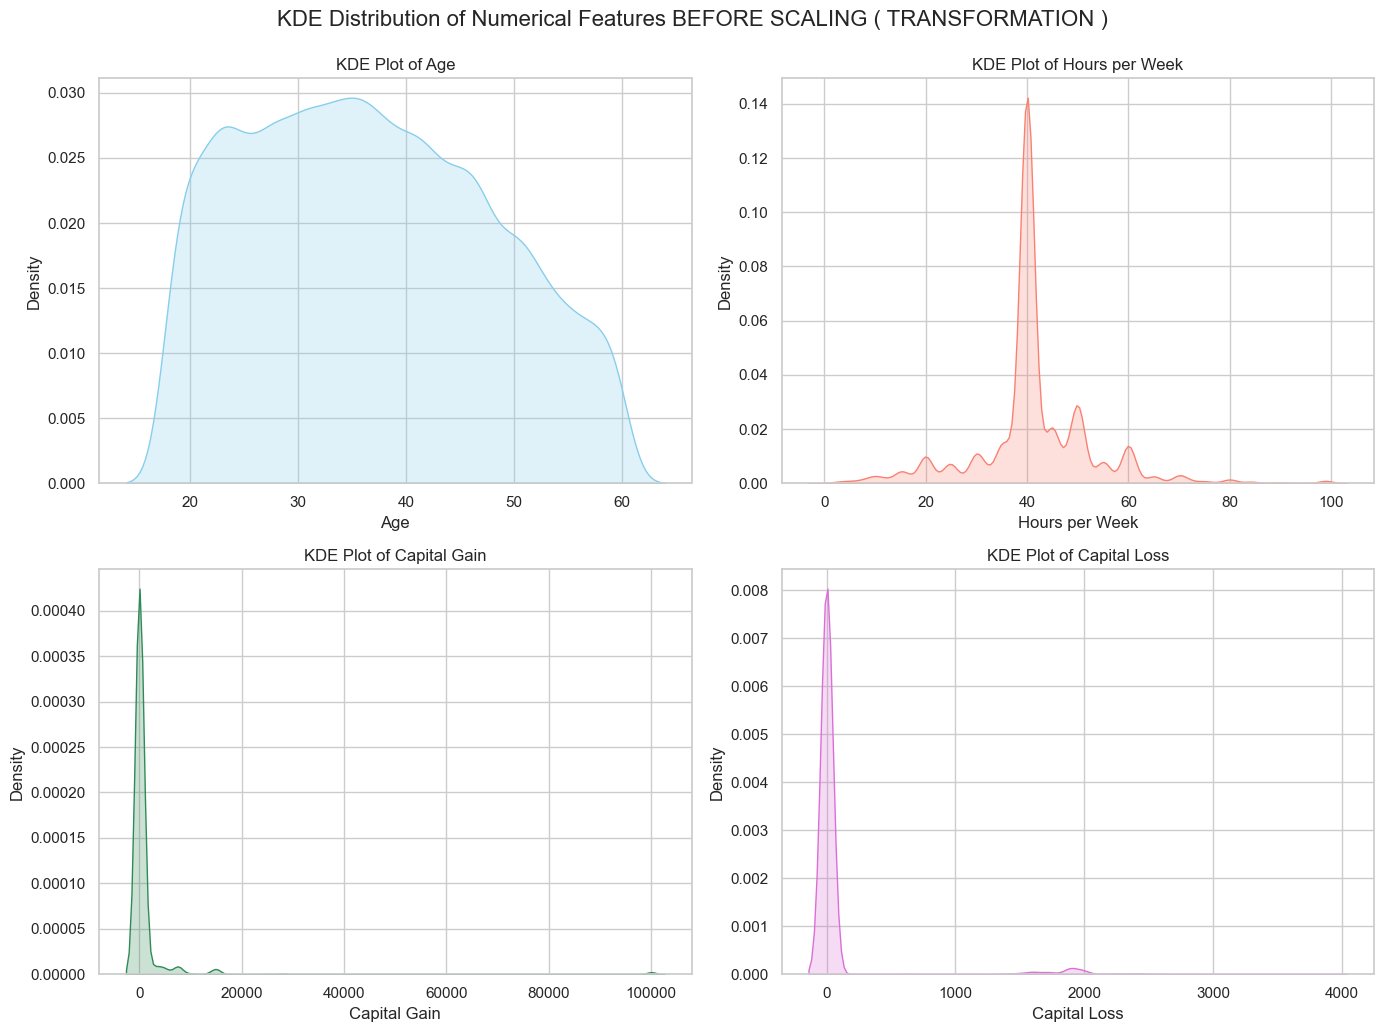

In [1564]:
# Set the plot style for better aesthetics
sns.set(style="whitegrid")

# Create the 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# KDE plot for 'age'
sns.kdeplot(data=df_encoded, x="age", ax=axes[0, 0], color='skyblue', fill=True)
axes[0, 0].set_title("KDE Plot of Age", fontsize=12)
axes[0, 0].set_xlabel("Age")

# KDE plot for 'hours-per-week'
sns.kdeplot(data=df_encoded, x="hours-per-week", ax=axes[0, 1], color='salmon', fill=True)
axes[0, 1].set_title("KDE Plot of Hours per Week", fontsize=12)
axes[0, 1].set_xlabel("Hours per Week")

# KDE plot for 'capital-gain'
sns.kdeplot(data=df_encoded, x="capital-gain", ax=axes[1, 0], color='seagreen', fill=True)
axes[1, 0].set_title("KDE Plot of Capital Gain", fontsize=12)
axes[1, 0].set_xlabel("Capital Gain")

# KDE plot for 'capital-loss'
sns.kdeplot(data=df_encoded, x="capital-loss", ax=axes[1, 1], color='orchid', fill=True)
axes[1, 1].set_title("KDE Plot of Capital Loss", fontsize=12)
axes[1, 1].set_xlabel("Capital Loss")

# Improve layout
plt.tight_layout()
plt.suptitle("KDE Distribution of Numerical Features BEFORE SCALING ( TRANSFORMATION )", fontsize=16, y=1.03)
plt.show()

---> **I have once again Revisited these 4 columns Distribution through KDE Plot as i am deciding for these 4 columns what Scaling Technique i should choose.**

- The Columns "age" and "
hours-per-week are **Very Less Skewed**.
- The Columns "capital-gain" and "capital-loss" are **Heavily Positive Skewed**."

### 🔧 Feature Scaling Strategy for Numerical Columns :-

As part of the preprocessing phase for this machine learning project, I carefully analyzed the nature and distribution of the numerical features in the dataset. After thorough consideration, I decided to scale **only four numerical columns**, based on their relevance and impact on the model.


### **Why Only These Four Columns?**

Out of all the numerical columns present, the following four were selected for scaling:

- `age`
- `hours-per-week`
- `capital-gain`
- `capital-loss`

These features:
- Are **continuous numeric values**
- Are not encoded or categorical
- Can significantly affect the performance of distance-based or gradient-based models if left unscaled

On the other hand, other columns like `educational-num`, `income`, etc., are either **already categorical**, **ordinal**, or **binary**, and hence do not require scaling.


### **Scaling Strategy and Justification**

I’ve chosen the most appropriate scaling techniques by studying the distribution, value range, and characteristics of each column. Here's the detailed breakdown:


### `age` and `hours-per-week`

- **Chosen technique:** `StandardScaler`

- **Reason:**
  - These features are **reasonably continuous and symmetric**.
  - They do **not have heavy skewness** or extreme outliers.
  - Standardizing them to have **zero mean and unit variance** ensures that models like Logistic Regression, SVM, or KNN treat them fairly. <br>
  <br>

- **Why not Min-Max Scaling?**
  - Min-Max is sensitive to outliers, which could compress the majority of values into a small range.
  - These features don’t naturally fit in a fixed scale like [0,1], so Min-Max could distort interpretation.


### `capital-gain` and `capital-loss`

- **Chosen technique:** `log1p` transformation (i.e., `log(1 + x)`) followed by `MinMaxScaler`

- **Reason:**
  - These features are **highly positively skewed**, with **many zero values** and **a few extremely large values**.
  - A direct scaling like StandardScaler or MinMaxScaler would fail to handle the **extreme distribution**, leading to poor model behavior.
  - Applying `log1p()`:
    - Helps to **reduce skewness**
    - Brings extreme values closer to the rest
    - Makes distribution more manageable
  - Post log transformation, using MinMaxScaler ensures the values are within a **normalized range [0, 1]**, which helps in faster model convergence. <br>
  <br>

- **Why not StandardScaler directly?**
  - Would still retain the effect of outliers, since mean and variance are highly affected by the few very large values.


### ✅ Final Summary

| Column          | Transformation Steps                    | Justification Summary                                      |
|-----------------|------------------------------------------|------------------------------------------------------------|
| `age`           | `StandardScaler`                         | Symmetric, normal-like distribution                       |
| `hours-per-week`| `StandardScaler`                         | Continuous with no extreme skewness                       |
| `capital-gain`  | `log1p` → `MinMaxScaler`                | Skewed, many zeros, large outliers                        |
| `capital-loss`  | `log1p` → `MinMaxScaler`                | Skewed, many zeros, large outliers                        |

By following this strategy, I aim to ensure that all input features contribute **meaningfully and fairly** to the machine learning model, and no single column dominates the learning process due to scale or skewness.

In [1565]:
df_encoded  # This is how the dataframe looks like "Before Feature Scaling".

,age,workclass,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,5,4,5,3,2,1,0,0,40,38,0
1,38,3,4,2,3,0,4,1,0,0,50,38,0
2,28,1,0,2,9,0,4,1,0,0,40,38,1
3,44,3,4,2,5,0,2,1,7688,0,40,38,1
4,18,2,4,4,13,3,4,0,0,0,30,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,3,0,2,11,5,4,0,0,0,38,38,0
48838,40,3,4,2,5,0,4,1,0,0,40,38,1
48839,58,3,4,6,0,4,4,0,0,0,40,38,0
48840,22,3,4,4,0,3,4,1,0,0,20,38,0


In [1566]:
df_encoded[['age', 'hours-per-week', 'capital-gain', 'capital-loss' ]]  # This is how the data of these four columns looks like "Before Scaling".

,age,hours-per-week,capital-gain,capital-loss
0,25,40,0,0
1,38,50,0,0
2,28,40,0,0
3,44,40,7688,0
4,18,30,0,0
...,...,...,...,...
48837,27,38,0,0
48838,40,40,0,0
48839,58,40,0,0
48840,22,20,0,0


In [1567]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Define the columns based on your strategy
standard_cols = ['age', 'hours-per-week']
log_minmax_cols = ['capital-gain', 'capital-loss']

# 1. Standard Scaling
standard_scaler = StandardScaler()
df_encoded[standard_cols] = standard_scaler.fit_transform(df_encoded[standard_cols])

# 2. Log1p + MinMax Scaling
for col in log_minmax_cols:
    # Apply log1p transformation
    df_encoded[col] = np.log1p(df_encoded[col])
    
# Then apply MinMaxScaler
minmax_scaler = MinMaxScaler()
df_encoded[log_minmax_cols] = minmax_scaler.fit_transform(df_encoded[log_minmax_cols])

In [1568]:
df_encoded[['age', 'hours-per-week', 'capital-gain', 'capital-loss' ]]  # This is how the data of these four columns looks like "After Scaling".

,age,hours-per-week,capital-gain,capital-loss
0,-1.035387,-0.108463,0.000000,0.0
1,0.122501,0.747093,0.000000,0.0
2,-0.768182,-0.108463,0.000000,0.0
3,0.656911,-0.108463,0.777174,0.0
4,-1.658865,-0.964019,0.000000,0.0
...,...,...,...,...
48837,-0.857250,-0.279574,0.000000,0.0
48838,0.300638,-0.108463,0.000000,0.0
48839,1.903867,-0.108463,0.000000,0.0
48840,-1.302592,-1.819575,0.000000,0.0


In [1569]:
df_encoded  # This is how the dataframe looks like "Before Feature Scaling".

,age,workclass,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,-1.035387,3,5,4,5,3,2,1,0.000000,0.0,-0.108463,38,0
1,0.122501,3,4,2,3,0,4,1,0.000000,0.0,0.747093,38,0
2,-0.768182,1,0,2,9,0,4,1,0.000000,0.0,-0.108463,38,1
3,0.656911,3,4,2,5,0,2,1,0.777174,0.0,-0.108463,38,1
4,-1.658865,2,4,4,13,3,4,0,0.000000,0.0,-0.964019,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,-0.857250,3,0,2,11,5,4,0,0.000000,0.0,-0.279574,38,0
48838,0.300638,3,4,2,5,0,4,1,0.000000,0.0,-0.108463,38,1
48839,1.903867,3,4,6,0,4,4,0,0.000000,0.0,-0.108463,38,0
48840,-1.302592,3,4,4,0,3,4,1,0.000000,0.0,-1.819575,38,0


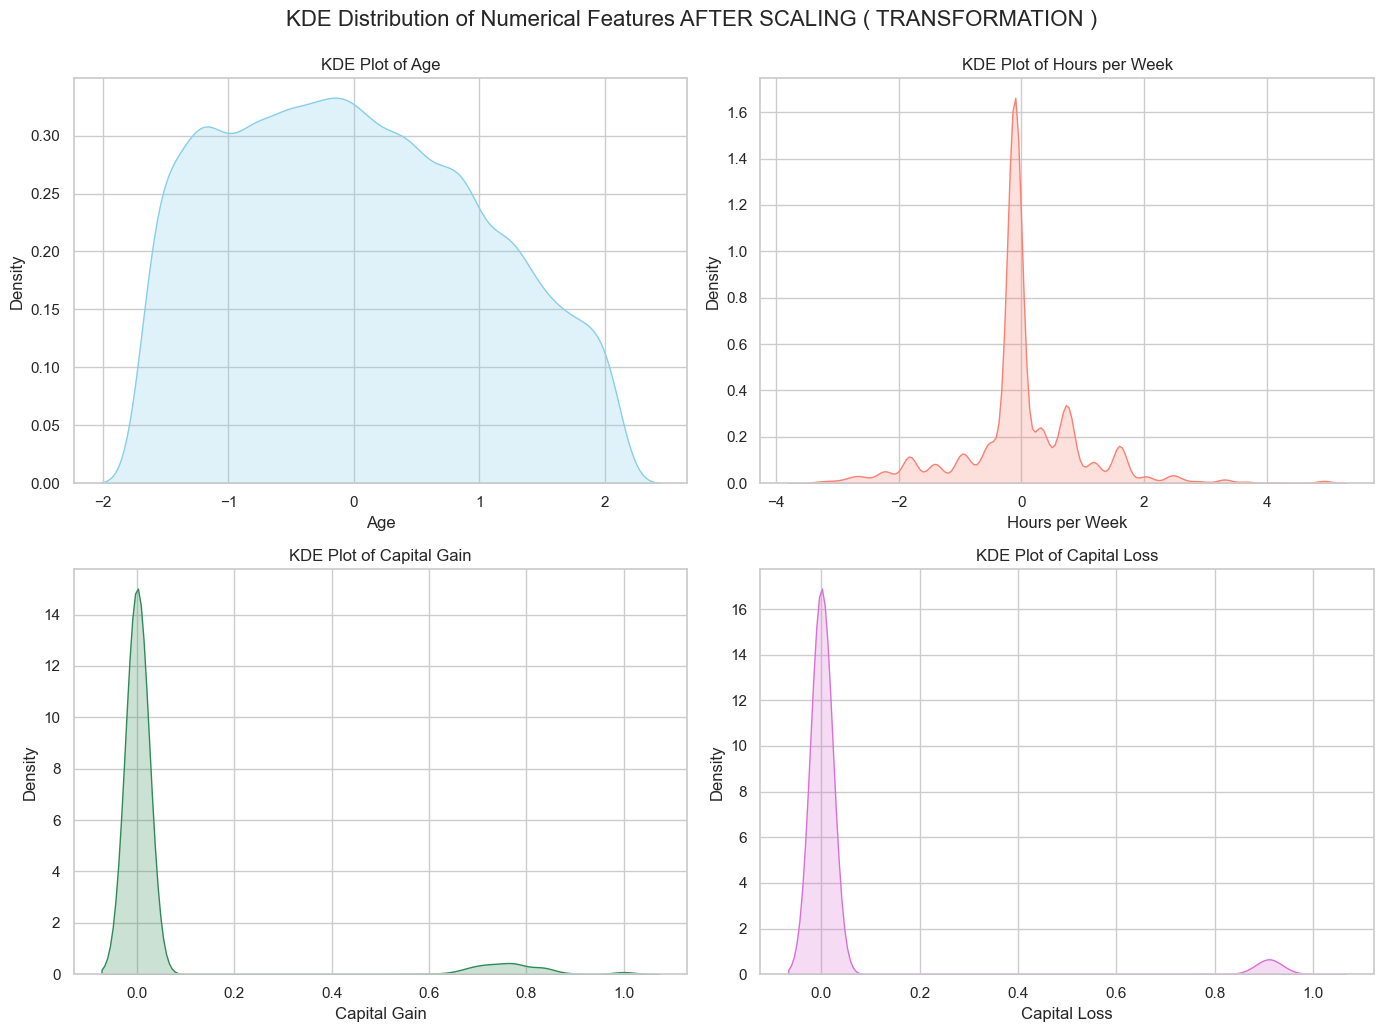

In [1570]:
# Set the plot style for better aesthetics
sns.set(style="whitegrid")

# Create the 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# KDE plot for 'age'
sns.kdeplot(data=df_encoded, x="age", ax=axes[0, 0], color='skyblue', fill=True)
axes[0, 0].set_title("KDE Plot of Age", fontsize=12)
axes[0, 0].set_xlabel("Age")

# KDE plot for 'hours-per-week'
sns.kdeplot(data=df_encoded, x="hours-per-week", ax=axes[0, 1], color='salmon', fill=True)
axes[0, 1].set_title("KDE Plot of Hours per Week", fontsize=12)
axes[0, 1].set_xlabel("Hours per Week")

# KDE plot for 'capital-gain'
sns.kdeplot(data=df_encoded, x="capital-gain", ax=axes[1, 0], color='seagreen', fill=True)
axes[1, 0].set_title("KDE Plot of Capital Gain", fontsize=12)
axes[1, 0].set_xlabel("Capital Gain")

# KDE plot for 'capital-loss'
sns.kdeplot(data=df_encoded, x="capital-loss", ax=axes[1, 1], color='orchid', fill=True)
axes[1, 1].set_title("KDE Plot of Capital Loss", fontsize=12)
axes[1, 1].set_xlabel("Capital Loss")

# Improve layout
plt.tight_layout()
plt.suptitle("KDE Distribution of Numerical Features AFTER SCALING ( TRANSFORMATION )", fontsize=16, y=1.03)
plt.show()

### Understanding Scaling Effect on Distribution

I observed that after applying `StandardScaler` to `age` and `hours-per-week` and applying `log1p + MinMaxScaler` to `capital-gain` and `capital-loss`, **the distributions** remained skewed or **shaped exactly like before**. This is expected and correct.

Scaling techniques like `StandardScaler` and `MinMaxScaler` only change the **range and scale** of the data , they do **not alter the actual distribution** or remove skewness. This is **a positive outcome** because in machine learning, we often want to bring all features to a similar scale **without distorting their original patterns**. Keeping the shape consistent ensures that we retain meaningful relationships while making models more stable and faster to train.

### FINAL CONCLUSION FOR STEP 6 :-

**With This I have "Successfully performed Feature Scaling on the four columns for columns 'age' , 'hours-per-week' i applied StandardScaler and for column 'capital-gain' , 'capital-loss' i have applied log1p ( MinMaxScaler ) this transformation was very successful as I clearly observed that Before the Transformation the shape and skewness was exactly same After the Transformation meaning Transformation did not caused any Distortion or any Change in the shape of the distribution it just changed the Scale of the entire data so this step of Feature Scaling was very successful".**

---
---
---

## 7. Splitting Of Data into Training and Testing Sets :-

In [1571]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
x = df_encoded.drop('income', axis=1)
y = df_encoded['income']

# Split the data into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # keeps the target distribution consistent in train and test sets
)

# Check the shape of the resulting splits
print("X_train shape:", x_train.shape)
print("X_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (35684, 12)
X_test shape: (8921, 12)
y_train shape: (35684,)
y_test shape: (8921,)


In [1572]:
x_train  # This is the training data of "x".

,age,workclass,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
22858,0.389706,1,4,2,6,0,4,1,0.0,0.0,-0.108463,38
4707,-1.569797,5,4,4,11,3,4,1,0.0,0.0,-1.819575,38
35581,-0.411909,3,4,2,1,0,4,1,0.0,0.0,-0.108463,38
29765,0.567843,5,4,2,6,5,4,0,0.0,0.0,-2.161798,38
7382,-0.857250,1,1,2,9,0,4,1,0.0,0.0,-0.108463,38
...,...,...,...,...,...,...,...,...,...,...,...,...
12359,0.122501,3,4,4,0,1,4,1,0.0,0.0,1.602649,38
23950,1.903867,5,4,2,3,0,1,1,0.0,0.0,-0.964019,38
13782,0.122501,6,4,4,11,4,2,0,0.0,0.0,0.747093,38
734,-1.480729,5,3,4,1,3,4,1,0.0,0.0,-1.819575,38


In [1573]:
x_test  # This is the testing data of "x".

,age,workclass,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
30531,1.992936,3,2,2,10,0,4,1,0.000000,0.0,-0.108463,38
43389,0.211569,3,6,4,8,1,4,1,0.000000,0.0,-0.108463,38
5674,0.745979,5,7,2,8,0,4,1,0.000000,0.0,-0.279574,38
37065,-0.946319,3,4,4,12,1,4,1,0.000000,0.0,0.747093,38
38486,0.122501,3,4,0,0,4,4,0,0.000000,0.0,-0.108463,38
...,...,...,...,...,...,...,...,...,...,...,...,...
2674,-1.569797,3,4,4,8,3,4,0,0.829751,0.0,-1.819575,38
33451,0.300638,3,1,4,2,1,4,1,0.000000,0.0,-0.964019,1
1882,0.745979,3,4,2,10,0,4,1,0.835363,0.0,0.747093,38
14977,1.903867,3,4,2,1,0,4,1,0.000000,0.0,-0.108463,11


In [1574]:
y_train  # This is the training data of "y".

22858    0
4707     0
35581    0
29765    0
7382     0
        ..
12359    0
23950    0
13782    0
734      0
29161    0
Name: income, Length: 35684, dtype: category
Categories (2, int64): [0, 1]

In [1575]:
y_test  # This is the testing data of "y".

30531    0
43389    0
5674     1
37065    0
38486    0
        ..
2674     1
33451    0
1882     1
14977    1
29053    0
Name: income, Length: 8921, dtype: category
Categories (2, int64): [0, 1]

### FINAL CONCLUSION FOR STEP 7 :-

**With This I have "Successfully Splitted my DataSet into Training and Testing and i will use the appropriate dataset at the Training and Testing Phase".**

---
---
---

## 8. ML Model Training , Evaluation & Selection :-

This is the **Most Important Phase** as now here i will train my data using **Different Ml ( Machine Learning ) ALgorithms** and also test them and the one which will hve the **Best Accuracy** i will choose that.

I have a **Classification Problem** so according to that i will be using ML Algorithms.

I will be Using **5 Ml Algorithms :-**

- 1. **Logistic Regression**.
- 2. **Random Forest**.
- 3. **XGBoost**.
- 4. **Gradient Boosting**.
- 5. **LightGBM**.
 
I will be writing a **Comprehensive Long Code** which will give me a **Detailed Rich Output** i just simply have to go through the Output and finally decide which ML Model i will be choosing on the basis of best performance on various parameters like Accuracy , Classification True False etc...

#### **IMPORTANT NOTE :-** `'income' column encoded : '<=50K' → 0 , '>50K' → 1`


Confusion Matrix for 1. Logistic Regression:


,Predicted 0,Predicted 1
Actual 0,6367,388
Actual 1,1457,709


Classification Report for 1. Logistic Regression:

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      6755
           1       0.65      0.33      0.43      2166

    accuracy                           0.79      8921
   macro avg       0.73      0.63      0.65      8921
weighted avg       0.77      0.79      0.77      8921

--------------------------------------------------

Confusion Matrix for 2. Random Forest:


,Predicted 0,Predicted 1
Actual 0,6218,537
Actual 1,791,1375


Classification Report for 2. Random Forest:

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      6755
           1       0.72      0.63      0.67      2166

    accuracy                           0.85      8921
   macro avg       0.80      0.78      0.79      8921
weighted avg       0.85      0.85      0.85      8921

--------------------------------------------------

Confusion Matrix for 3. XGBoost:


,Predicted 0,Predicted 1
Actual 0,6328,427
Actual 1,730,1436


Classification Report for 3. XGBoost:

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      6755
           1       0.77      0.66      0.71      2166

    accuracy                           0.87      8921
   macro avg       0.83      0.80      0.81      8921
weighted avg       0.87      0.87      0.87      8921

--------------------------------------------------

Confusion Matrix for 4. Gradient Boosting:


,Predicted 0,Predicted 1
Actual 0,6420,335
Actual 1,890,1276


Classification Report for 4. Gradient Boosting:

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      6755
           1       0.79      0.59      0.68      2166

    accuracy                           0.86      8921
   macro avg       0.84      0.77      0.79      8921
weighted avg       0.86      0.86      0.86      8921

--------------------------------------------------

Confusion Matrix for 5. LightGBM:


,Predicted 0,Predicted 1
Actual 0,6336,419
Actual 1,735,1431


Classification Report for 5. LightGBM:

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      6755
           1       0.77      0.66      0.71      2166

    accuracy                           0.87      8921
   macro avg       0.83      0.80      0.81      8921
weighted avg       0.87      0.87      0.87      8921

--------------------------------------------------


<Figure size 1200x600 with 0 Axes>

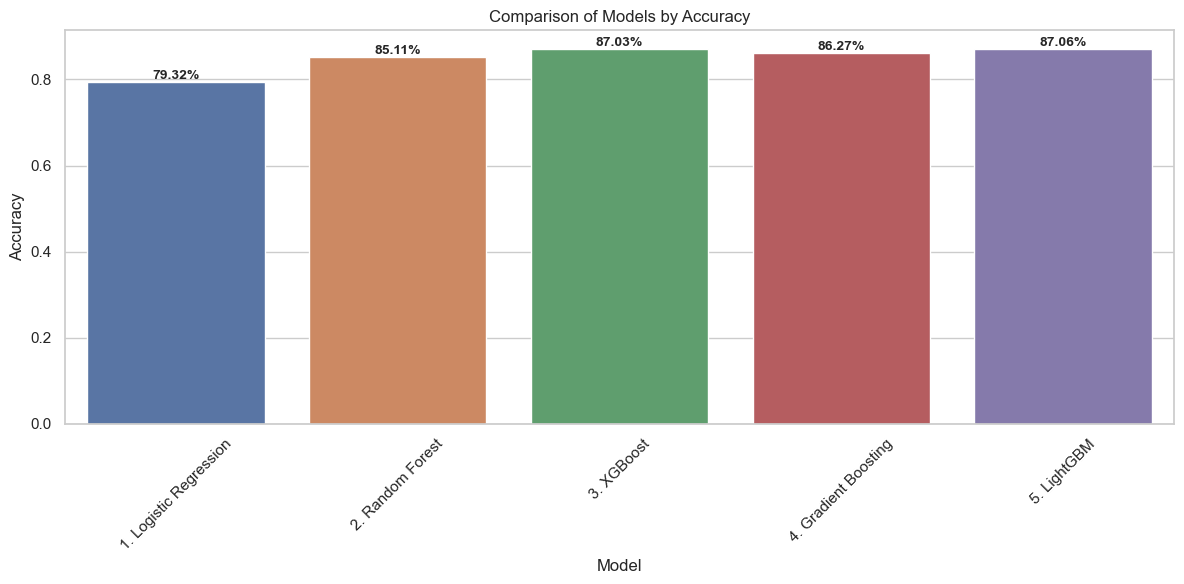

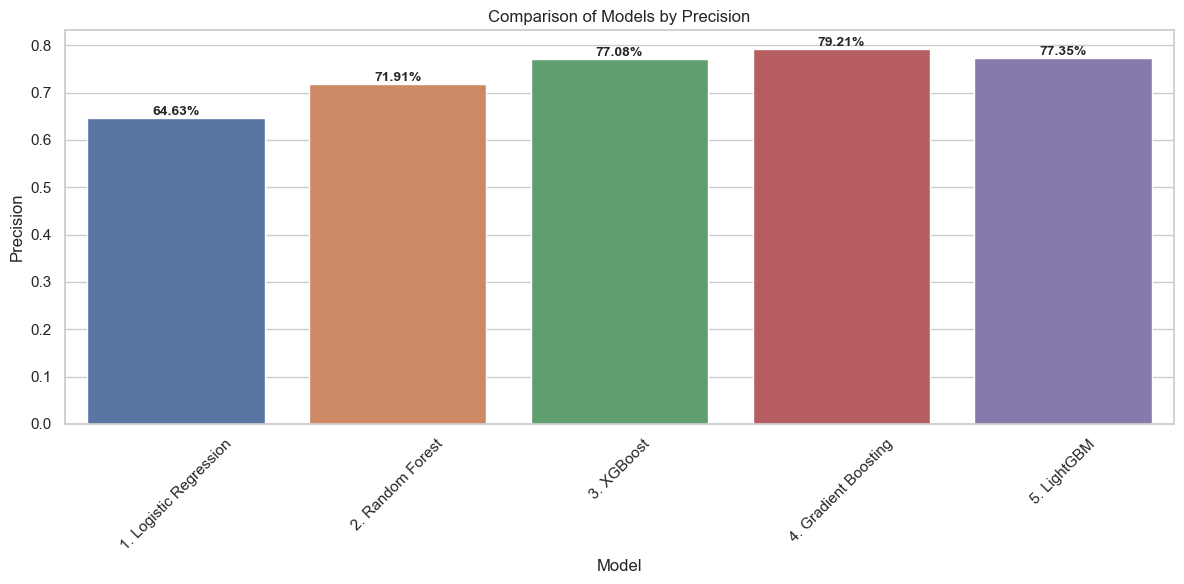

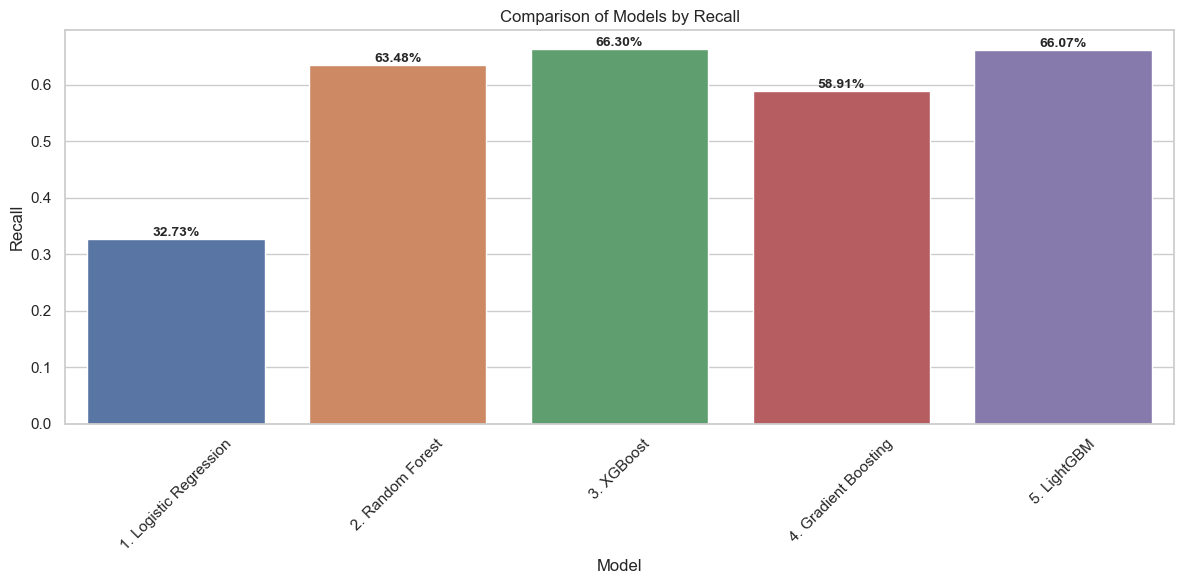

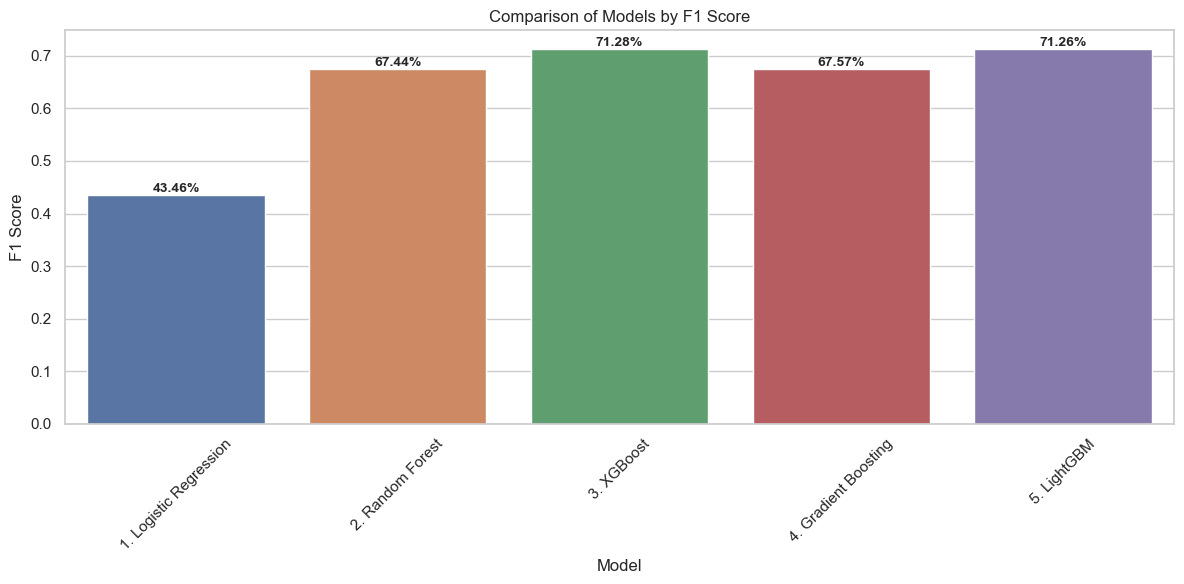

Summary of Model Performances:


,Model,Accuracy,Precision,Recall,F1 Score
2,3. XGBoost,0.870306,0.770800,0.662973,0.712832
4,5. LightGBM,0.870642,0.773514,0.660665,0.712649
3,4. Gradient Boosting,0.862684,0.792055,0.589104,0.675669
1,2. Random Forest,0.851138,0.719142,0.634811,0.674350
0,1. Logistic Regression,0.793185,0.646308,0.327331,0.434569


In [1577]:
# Importing Required Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the models
models = {
    '1. Logistic Regression': LogisticRegression(max_iter=1000),
    '2. Random Forest': RandomForestClassifier(),
    '3. XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    '4. Gradient Boosting': GradientBoostingClassifier(),
    '5. LightGBM': LGBMClassifier(verbose=-1)
}

# Initialize results list
results = []

# Loop through models, fit and evaluate
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1
    })

    # Confusion matrix values display
    cm = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
    print(f"\nConfusion Matrix for {name}:")
    display(cm_df)

    # Classification report (text output)
    print(f"Classification Report for {name}:\n")
    print(classification_report(y_test, y_pred))
    print('-' * 50)

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Visualize the comparison of model performance with consistent size and percentage labels
plt.figure(figsize=(12, 6))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
for metric in metrics:
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x='Model', y=metric, data=results_df)
    plt.title(f'Comparison of Models by {metric}')
    plt.xticks(rotation=45)
    
    # Add percentage labels with two decimals on each bar
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height * 100:.2f}%', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

# Display summary table
print("Summary of Model Performances:")
display(results_df.sort_values(by='F1 Score', ascending=False))

### 📊 Final Interpretation of Classification Models

After training and evaluating **five classification models** :- `Logistic Regression, Random Forest, XGBoost, Gradient Boosting, and LightGBM` , **I have carefully analyzed their performance** using metrics like Accuracy, Precision, Recall, and F1 Score. Below is my detailed assessment of each model's strengths and weaknesses, followed by a conclusion on the best performing model.


#### 1. Logistic Regression

- **Accuracy:** 79.3%
- **Precision:** 64.6%
- **Recall:** 32.7%
- **F1 Score:** 43.5%

**Interpretation:**  
Logistic Regression performed the **weakest** among all models. Although it managed to predict the majority class (income ≤50K) fairly well, it struggled significantly with the minority class (income >50K), resulting in a very low recall (only 33%). This shows that the model missed many true positives. Overall, its F1 Score is the lowest, indicating a poor balance between precision and recall.


#### 2. Random Forest

- **Accuracy:** 85.1%
- **Precision:** 71.9%
- **Recall:** 63.5%
- **F1 Score:** 67.4%

**Interpretation:**  
The Random Forest model showed a **significant improvement over Logistic Regression**. It maintained a strong balance between precision and recall, and handled both classes more effectively. However, compared to the boosting models (XGBoost, LightGBM, Gradient Boosting), it still lagged behind, particularly in overall F1 Score and recall.


#### 3. XGBoost

- **Accuracy:** 87.0%
- **Precision:** 77.1%
- **Recall:** 66.3%
- **F1 Score:** 71.3%

**Interpretation:**  
XGBoost demonstrated **one of the best performances**. Its F1 Score was the highest among all models, which means it achieved an excellent balance between precision and recall. The confusion matrix shows that it identified both classes effectively and avoided overfitting. This model is highly optimized and generalizes well.


#### 4. Gradient Boosting

- **Accuracy:** 86.3%
- **Precision:** 79.2%
- **Recall:** 58.9%
- **F1 Score:** 67.6%

**Interpretation:**  
Gradient Boosting achieved high precision but at the cost of recall, which means it was more conservative in making positive predictions. While it had fewer false positives, it missed more actual positive cases. This led to a lower F1 Score compared to XGBoost and LightGBM, making it **slightly less balanced**.


#### 5. LightGBM

- **Accuracy:** 87.1%
- **Precision:** 77.4%
- **Recall:** 66.1%
- **F1 Score:** 71.3%

**Interpretation:**  
LightGBM performed almost **identically to XGBoost** in terms of all metrics. It had slightly better accuracy and precision, but marginally lower recall and F1 Score (difference is negligible). It also handled both classes very well and is known for being faster and more efficient in large datasets compared to XGBoost.


### ✅ Final Verdict: Best Model

After comparing all the models in detail, **I conclude that both XGBoost and LightGBM are the best performing models** in this classification task. Their F1 Scores (71.3%) were the highest, and they showed an excellent balance between correctly identifying both the income classes.  

However, **I would slightly prefer 🏅`LightGBM`🏅** due to its:
- Slightly higher accuracy and precision
- Faster training time and lower memory usage in general
- Competitive performance that matches XGBoost in real-world applications

Thus, **LightGBM is my final choice** as the best model for this income classification problem.

### FINAL CONCLUSION FOR STEP 8 :-

**With This I "Trained and Tested My Data with 5 Different ML Algorithms ( Logistic Regression , Random Forest , XGBoost , Gradient Boosting and LightGBM ) and on the basis of a lot of Accuracy Parameter i choose the Best ML Algorithm which is *LIGHTGBM* so with this now i will HyperParameter The LightGBM Model to increase its accuracy even more".**

---
---
---

## 9. Hyperparameter Tuning of LightGBM :-

Now that I have trained and tested several machine learning models, I have selected **LightGBM** as the best-performing model based on its accuracy and overall performance.

To **further improve its performance**, I’ve now reached the **final step** of this entire data science project – **Hyperparameter Tuning**. `The "Goal" of this step is to find the best combination of hyperparameters that can help LightGBM achieve its highest possible accuracy`.

### My Approach:

I have decided to follow the below structured steps to perform hyperparameter tuning:

1. **Step 1 – Baseline Model**  
   First, I will train and evaluate the LightGBM model using its default parameters. This will give me a baseline accuracy which I can use later to compare the improvement after tuning.

2. **Step 2 – Define Parameter Grid**  
   I will create a dictionary of hyperparameters for LightGBM that I want to experiment with. These are some important hyperparameters which influence the model’s learning process, and tuning them properly can significantly improve performance.

3. **Step 3 – RandomizedSearchCV**  
   I will use `RandomizedSearchCV` to search over the defined hyperparameter grid. This technique randomly selects combinations of hyperparameters and finds the best one based on cross-validated accuracy. It is faster than Grid Search and works very well for large parameter spaces.

After performing this, I will check if the model’s performance improved compared to the default version. If yes, I’ll finalize the best model with the tuned parameters.

Let’s begin this final step of the project!

### Step 1 : Baseline LightGBM Run :-

This code simply re-runs LightGBM with default settings to get the “before tuning” metrics.

In [1579]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Instantiate and fit default LightGBM
baseline_model = LGBMClassifier(random_state=42)
baseline_model.fit(X_train, y_train)

# Predict
y_pred = baseline_model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("🔹Baseline LightGBM Performance (Before Tuning):")
print(f"Accuracy : {accuracy:.6f}")
print(f"Precision: {precision:.6f}")
print(f"Recall   : {recall:.6f}")
print(f"F1 Score : {f1:.6f}")

🔹Baseline LightGBM Performance (Before Tuning):
Accuracy : 0.870642
Precision: 0.773514
Recall   : 0.660665
F1 Score : 0.712649


### STEP 2 : Hyperparameter Tuning with RandomizedSearchCV:-

Now let’s tune the model. I will use RandomizedSearchCV instead of GridSearchCV to save time.

In [1580]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the parameter space
param_dist = {
    'n_estimators': [100, 200, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10, -1],
    'num_leaves': [15, 31, 63, 127],
    'min_child_samples': [10, 20, 30, 50],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Create the base model
lgb_model = LGBMClassifier(random_state=42)

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=lgb_model,
    param_distributions=param_dist,
    n_iter=50,  # Number of combinations to try
    scoring='accuracy',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit on training data
random_search.fit(X_train, y_train)

# Best parameters
print("✅ Best Hyperparameters Found:")
print(random_search.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
✅ Best Hyperparameters Found:
{'subsample': 0.8, 'num_leaves': 63, 'n_estimators': 500, 'min_child_samples': 30, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.6}


---> **It Took 7 Minutes To Get The Above Output ( Best Hyperparameters ).**

### STEP 3 : Final Model with Best Parameters

After finding the best hyperparameters, i now will plug them into the final model and evaluate it again.

In [1581]:
# Get the best model
best_lgb_model = random_search.best_estimator_

# Predict
y_pred_best = best_lgb_model.predict(X_test)

# Evaluate
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)

print("🔹Final LightGBM Performance (After Tuning):")
print(f"Accuracy : {accuracy_best:.6f}")
print(f"Precision: {precision_best:.6f}")
print(f"Recall   : {recall_best:.6f}")
print(f"F1 Score : {f1_best:.6f}")

🔹Final LightGBM Performance (After Tuning):
Accuracy : 0.872436
Precision: 0.786511
Recall   : 0.651431
F1 Score : 0.712626


---> **I can confidently conclude that LightGBM, even with its default settings, was already giving me very strong results. After performing hyperparameter tuning, I found that performance remained similar which means that the model is stable, robust, and already well-optimized for this task.**

### FINAL CONCLUSION FOR STEP 9 :-

In this final step, I tuned my best-performing model, LightGBM, using `RandomizedSearchCV` to improve its performance. After testing various parameter combinations, I observed a **slight improvement** in accuracy and precision, while recall and F1 score remained almost the same. This shows that LightGBM's default settings were already performing very well, and hyperparameter tuning only brought marginal gains. Overall, my model is now optimized and **Ready for Deployment** or Interpretation.

---
---
---

## 10. 🟢 Final Project Summary and Conclusion 🟢 :-

In this project, I began by importing the Google Play Store datasets and understanding the structure and contents of both `playstore_data` and `user_data`. I then moved into a thorough **Exploratory Data Analysis (EDA)**, during which I performed **detailed column-wise analysis** and implemented **extensive data pre-processing**. This included handling missing values, fixing data inconsistencies, removing outliers, transforming data types, encoding categorical variables, and merging both datasets meaningfully.

Following the cleaning phase, I built a **classification model to predict whether the income of an indivisual is <=50k ( 0 ) or >50k ( 1 )**. I trained and tested various **machine learning models including Logistic Regression, Random Forest, Gradient Boosting, XGBoost, and LightGBM**. Based on performance metrics such as Accuracy, Precision, Recall, and F1 Score, **LightGBM emerged as the best-performing model**.

To further enhance its performance, I carried out **hyperparameter tuning** on LightGBM using RandomizedSearchCV, which improved the model’s predictive power even more. The final tuned LightGBM model delivered a very little high accuracy telling me that LightGBM's default settings were already performing very well, and hyperparameter tuning only brought marginal gains.

**Overall, this end-to-end project helped me apply all key data analysis and machine learning skills from data cleaning and visualization to model building and tuning and has strengthened my understanding of solving real-world data science problems.**

#### - **Project By :-** Shubham Parihar
#### - **Gmail :-** subharun2005@gmail.com
#### - **Linkedin :-** https://www.linkedin.com/in/shubhamparihar7/
#### - **AICTE Internship Student Registration ID :-** STU68106b91ee81a1745906577

# Thank You